In [1]:
import scvelo as scv
import pandas as pd
import csv
import umap
import igraph
import louvain
from scipy import io
from scipy.sparse import coo_matrix, csr_matrix
import os
import anndata
import scanpy as sc
import session_info
import h5py

In [2]:
import numpy as np
np.version.version

'1.19.0'

In [4]:
#set figure parameters 
scv.set_figure_params(figsize = [14,14])

In [5]:
#Create AnnData object from seurat-data

#load matrix 
X = io.mmread("/Users/franziskahildebrandt/t.gondi_dc/data/adata_create/counts.mtx")
# create anndata object
adata = anndata.AnnData(
    X=X.transpose().tocsr())

# load cell metadata:
cell_meta = pd.read_csv("/Users/franziskahildebrandt/t.gondi_dc/data/adata_create/metadata.csv")

# load gene names:
with open("/Users/franziskahildebrandt/t.gondi_dc/data/adata_create/gene_names.csv", 'r') as f:
    gene_names = f.read().splitlines()
    
# set anndata observations and index obs by barcodes, var by gene names
adata.obs = cell_meta
adata.obs.index = adata.obs['barcode']
adata.var.index = gene_names

# load dimensional reduction:
pca = pd.read_csv("/Users/franziskahildebrandt/t.gondi_dc/data/adata_create/pca.csv")
pca.index = adata.obs.index

# set pca and umap
adata.obsm['X_pca'] = pca.to_numpy()
adata.obsm['X_umap'] = np.vstack((adata.obs['UMAP_1'].to_numpy(), adata.obs['UMAP_2'].to_numpy())).T

# plot a UMAP colored by sampleID to test:
#sc.pl.umap(adata, color=['cell_class'], frameon=False, save=True)
##show a specific column based on index: 
#adata.obs.iloc[:, 14] -> column 14

##write data 
#adata.write_h5ad("/Users/franziskahildebrandt/t.gondi_dc/data/anndata_dc_mus.h5ad")
#adata.obs

#adata

In [6]:
adata.obs

orig.ident    nCount_RNA  nFeature_RNA          nUMI    mouse_nUMI  \
barcode                                                                       
131_A10         131  4.133802e+05          4892  4.258349e+05  4.036826e+05   
131_A11         131  7.862871e+05          5712  8.287361e+05  7.620406e+05   
131_A13         131  1.044414e+06          5756  1.306182e+06  1.011312e+06   
131_A14         131  2.523688e+05          6196  2.810773e+05  2.424856e+05   
131_A15         131  3.206352e+05          7346  3.151742e+05  3.091680e+05   
...             ...           ...           ...           ...           ...   
132_P5          132  2.251644e+04          4283  2.109597e+04  2.108626e+04   
132_P6          132  4.816485e+04          5128  4.590164e+04  4.587799e+04   
132_P7          132  2.391677e+05          6681  2.569708e+05  2.326182e+05   
132_P8          132  6.477668e+04          6089  6.956326e+04  6.148584e+04   
132_P9          132  6.226021e+04          5164  9.233993e+04  6.009680e+04   

             toxo_nUMI  nGene  mouse_nGene  toxo_nGene  cell_ID  ...  \
barcode                                                          ...   
131_A10   22152.258773   5138         4399         739        1  ...   
131_A11   66695.545592   6194         5157        1037        2  ...   
131_A13  294869.721269   6764         5255        1509        3  ...   
131_A14   38591.747761   6675         5109        1566        4  ...   
131_A15    6006.228945   7393         6793         600        5  ...   
...                ...    ...          ...         ...      ...  ...   
132_P5        9.710552   1890         1890           0      571  ...   
132_P6       23.650041   2835         2835           0      572  ...   
132_P7    24352.556181   7255         5327        1928      573  ...   
132_P8     8077.413207   4821         3809        1012      574  ...   
132_P9    32243.138954   5448         3583        1865      575  ...   

         toxoclusters  Gra15_expression  Rop16_expression  celltype  \
barcode                                                               
131_A10        toxo_3            Gra15-            Rop16-    GM-Mac   
131_A11        toxo_3            Gra15+            Rop16-     GM-DC   
131_A13        toxo_2            Gra15-            Rop16+     GM-DC   
131_A14        toxo_0            Gra15+            Rop16-     GM-DC   
131_A15        toxo_0            Gra15-            Rop16-    GM-Mac   
...               ...               ...               ...       ...   
132_P5            NaN               NaN               NaN     GM-DC   
132_P6            NaN               NaN               NaN     GM-DC   
132_P7         toxo_1            Gra15+            Rop16+    GM-Mac   
132_P8         toxo_0            Gra15-            Rop16+    GM-Mac   
132_P9         toxo_2            Gra15-            Rop16+    GM-Mac   

        cell_class_type cluster_type  snn_ica_res.0.8  barcode    UMAP_1  \
barcode                                                                    
131_A10   LDM_3h_GM-Mac     1_GM-Mac                1  131_A10  2.326656   
131_A11    LDM_3h_GM-DC      0_GM-DC                8  131_A11 -2.717704   
131_A13   LDM_12h_GM-DC      6_GM-DC                5  131_A13 -1.033561   
131_A14   LDM_12h_GM-DC      4_GM-DC                5  131_A14  0.758215   
131_A15  LDM_12h_GM-Mac     2_GM-Mac                3  131_A15  1.579935   
...                 ...          ...              ...      ...       ...   
132_P5        LPS_GM-DC      7_GM-DC                7   132_P5 -2.804162   
132_P6        LPS_GM-DC      7_GM-DC                7   132_P6 -2.764174   
132_P7    PTG_3h_GM-Mac     1_GM-Mac                0   132_P7  2.311926   
132_P8    PTG_3h_GM-Mac     5_GM-Mac                4   132_P8  3.171298   
132_P9    PTG_3h_GM-Mac     1_GM-Mac                1   132_P9  2.151034   

           UMAP_2  
barcode            
131_A10  1.643767  
131_A11 -0.773424  
131_A13 -1.039307  
131_A14 -1.188897  
131_A15  0.

In [7]:
#adata = scv.read("/Users/franziskahildebrandt/t.gondi_dc/data/anndata_dc_mus.h5ad")
adata

AnnData object with n_obs × n_vars = 518 × 25309
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'nUMI', 'mouse_nUMI', 'toxo_nUMI', 'nGene', 'mouse_nGene', 'toxo_nGene', 'cell_ID', 'mouse_nUMI_p', 'toxo_nUMI_p', 'mouse_nGene_p', 'toxo_nGene_p', 'well', 'cell_class', 'percent.mt', 'percent.mature', 'percent.immature', 'nCount_SCT', 'nFeature_SCT', 'SCT_snn_res.0.8', 'seurat_clusters', 'cluster_and_cell_class', 'matureDC1', 'matureDC2', 'matureDC3', 'matureDC4', 'toxoclusters', 'Gra15_expression', 'Rop16_expression', 'celltype', 'cell_class_type', 'cluster_type', 'snn_ica_res.0.8', 'barcode', 'UMAP_1', 'UMAP_2'
    obsm: 'X_pca', 'X_umap'

In [8]:
ldata1 = scv.read("/Users/franziskahildebrandt/t.gondi_dc/data/velocyto/OUTPUT/131/onefilepercell_A10_R1_and_others_KC4RZ.loom", cache=True)
ldata1.var
ldata1.var_names_make_unique

#Do the same for the second plate

ldata2 = scv.read("/Users/franziskahildebrandt/t.gondi_dc/data/velocyto/OUTPUT/132/onefilepercell_A10_R1_and_others_SL8F7.loom", cache=True)
ldata2.var
ldata2.var_names_make_unique


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


<bound method AnnData.var_names_make_unique of AnnData object with n_obs × n_vars = 380 × 63736
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand'
    layers: 'ambiguous', 'matrix', 'spanning', 'spliced', 'unspliced'>

In [9]:
ldata2.obs.to_csv("/Users/franziskahildebrandt/t.gondi_dc/data/velocyto/obs_132.tsv", sep = "\t")
                  

In [10]:
ldata1.obs

Empty DataFrame
Columns: []
Index: [onefilepercell_A10_R1_and_others_KC4RZ:A10_R1.fastq.gzAligned.sortedByCoord.out.bam, onefilepercell_A10_R1_and_others_KC4RZ:A11_R1.fastq.gzAligned.sortedByCoord.out.bam, onefilepercell_A10_R1_and_others_KC4RZ:A12_R1.fastq.gzAligned.sortedByCoord.out.bam, onefilepercell_A10_R1_and_others_KC4RZ:A13_R1.fastq.gzAligned.sortedByCoord.out.bam, onefilepercell_A10_R1_and_others_KC4RZ:A14_R1.fastq.gzAligned.sortedByCoord.out.bam, onefilepercell_A10_R1_and_others_KC4RZ:A15_R1.fastq.gzAligned.sortedByCoord.out.bam, onefilepercell_A10_R1_and_others_KC4RZ:A16_R1.fastq.gzAligned.sortedByCoord.out.bam, onefilepercell_A10_R1_and_others_KC4RZ:A17_R1.fastq.gzAligned.sortedByCoord.out.bam, onefilepercell_A10_R1_and_others_KC4RZ:A18_R1.fastq.gzAligned.sortedByCoord.out.bam, onefilepercell_A10_R1_and_others_KC4RZ:A19_R1.fastq.gzAligned.sortedByCoord.out.bam, onefilepercell_A10_R1_and_others_KC4RZ:A1_R1.fastq.gzAligned.sortedByCoord.out.bam, onefilepercell_A10_R1_and_others_KC4RZ:A20_R1.fastq.gzAligned.sortedByCoord.out.bam, onefilepercell_A10_R1_and_others_KC4RZ:A21_R1.fastq.gzAligned.sortedByCoord.out.bam, onefilepercell_A10_R1_and_others_KC4RZ:A22_R1.fastq.gzAligned.sortedByCoord.out.bam, onefilepercell_A10_R1_and_others_KC4RZ:A23_R1.fastq.gzAligned.sortedByCoord.out.bam, onefilepercell_A10_R1_and_others_KC4RZ:A24_R1.fastq.gzAligned.sortedByCoord.out.bam, onefilepercell_A10_R1_and_others_KC4RZ:A2_R1.fastq.gzAligned.sortedByCoord.out.bam, onefilepercell_A10_R1_and_others_KC4RZ:A3_R1.fastq.gzAligned.sortedByCoord.out.bam, onefilepercell_A10_R1_and_others_KC4RZ:A4_R1.fastq.gzAligned.sortedByCoord.out.bam, onefilepercell_A10_R1_and_others_KC4RZ:A5_R1.fastq.gzAligned.sortedByCoord.out.bam, onefilepercell_A10_R1_and_others_KC4RZ:A6_R1.fastq.gzAligned.sortedByCoord.out.bam, onefilepercell_A10_R1_and_others_KC4RZ:A7_R1.fastq.gzAligned.sortedByCoord.out.bam, onefilepercell_A10_R1_and_others_KC4RZ:A8_R1.fastq.gzAligned.sortedByCoord.out.bam, onefilepercell_A10_R1_and_others_KC4RZ:A9_R1.fastq.gzAligned.sortedByCoord.out.bam, onefilepercell_A10_R1_and_others_KC4RZ:B10_R1.fastq.gzAligned.sortedByCoord.out.bam, onefilepercell_A10_R1_and_others_KC4RZ:B11_R1.fastq.gzAligned.sortedByCoord.out.bam, onefilepercell_A10_R1_and_others_KC4RZ:B12_R1.fastq.gzAligned.sortedByCoord.out.bam, onefilepercell_A10_R1_and_others_KC4RZ:B13_R1.fastq.gzAligned.sortedByCoord.out.bam, onefilepercell_A10_R1_and_others_KC4RZ:B14_R1.fastq.gzAligned.sortedByCoord.out.bam, onefilepercell_A10_R1_and_others_KC4RZ:B15_R1.fastq.gzAligned.sortedByCoord.out.bam, onefilepercell_A10_R1_and_others_KC4RZ:B16_R1.fastq.gzAligned.sortedByCoord.out.bam, onefilepercell_A10_R1_and_others_KC4RZ:B17_R1.fastq.gzAligned.sortedByCoord.out.bam, onefilepercell_A10_R1_and_others_KC4RZ:B18_R1.fastq.gzAligned.sortedByCoord.out.bam, onefilepercell_A10_R1_and_others_KC4RZ:B19_R1.fastq.gzAligned.sortedByCoord.out.bam, onefilepercell_A10_R1_and_others_KC4RZ:B1_R1.fastq.gzAligned.sortedByCoord.out.bam, onefilepercell_A10_R1_and_others_KC4RZ:B20_R1.fastq.gzAligned.sortedByCoord.out.bam, onefilepercell_A10_R1_and_others_KC4RZ:B21_R1.fastq.gzAligned.sortedByCoord.out.bam, onefilepercell_A10_R1_and_others_KC4RZ:B22_R1.fastq.gzAligned.sortedByCoord.out.bam, onefilepercell_A10_R1_and_others_KC4RZ:B23_R1.fastq.gzAligned.sortedByCoord.out.bam, onefilepercell_A10_R1_and_others_KC4RZ:B24_R1.fastq.gzAligned.sortedByCoord.out.bam, onefilepercell_A10_R1_and_others_KC4RZ:B2_R1.fastq.gzAligned.sortedByCoord.out.bam, onefilepercell_A10_R1_and_others_KC4RZ:B3_R1.fastq.gzAligned.sortedByCoord.out.bam, onefilepercell_A10_R1_and_others_KC4RZ:B4_R1.fastq.gzAligned.sortedByCoord.out.bam, onefilepercell_A10_R1_and_others_KC4RZ:B5_R1.fastq.gzAligned.sortedByCoord.out.bam, onefilepercell_A10_R1_and_others_KC4RZ:B6_R1.fastq.gzAligned.sortedByCoord.out.bam, onefilepercell_A10_R1_and_others_KC4RZ:B7_R1.fastq.gzAligned.sortedByCoord.out.bam, onefilepercell_A10_R1_and_others_KC4RZ:B8_R1.fastq.gzAligned.sortedByC

In [11]:
ldata2.var

Accession Chromosome       End     Start Strand
Xkr4      ENSMUSG00000051951          1   3741721   3276124      -
Gm37180   ENSMUSG00000103377          1   3438772   3435954      -
Gm37363   ENSMUSG00000104017          1   3448011   3445779      -
Gm37686   ENSMUSG00000103025          1   3537508   3535200      -
Gm37329   ENSMUSG00000103201          1   3584730   3582674      -
...                      ...        ...       ...       ...    ...
Gm29504   ENSMUSG00000100533          Y  90288770  90286493      +
Gm20837   ENSMUSG00000096178          Y  90444532  90412517      +
Mid1-ps1  ENSMUSG00000095134          Y  90774754  90764326      +
Gm47283   ENSMUSG00000096768          Y  90827734  90796007      +
Gm21742   ENSMUSG00000099871          Y  90855309  90848682      +

[63736 rows x 5 columns]

In [12]:
ldata2.obs

#"132_G3" "132_M1" "132_M2" "132_O6" are not present in loom file - need to be removed from the cellcount file to continue analysis

Empty DataFrame
Columns: []
Index: [onefilepercell_A10_R1_and_others_SL8F7:A10_R1.fastqAligned.sortedByCoord.out.bam, onefilepercell_A10_R1_and_others_SL8F7:A11_R1.fastqAligned.sortedByCoord.out.bam, onefilepercell_A10_R1_and_others_SL8F7:A12_R1.fastqAligned.sortedByCoord.out.bam, onefilepercell_A10_R1_and_others_SL8F7:A13_R1.fastqAligned.sortedByCoord.out.bam, onefilepercell_A10_R1_and_others_SL8F7:A14_R1.fastqAligned.sortedByCoord.out.bam, onefilepercell_A10_R1_and_others_SL8F7:A15_R1.fastqAligned.sortedByCoord.out.bam, onefilepercell_A10_R1_and_others_SL8F7:A16_R1.fastqAligned.sortedByCoord.out.bam, onefilepercell_A10_R1_and_others_SL8F7:A17_R1.fastqAligned.sortedByCoord.out.bam, onefilepercell_A10_R1_and_others_SL8F7:A18_R1.fastqAligned.sortedByCoord.out.bam, onefilepercell_A10_R1_and_others_SL8F7:A19_R1.fastqAligned.sortedByCoord.out.bam, onefilepercell_A10_R1_and_others_SL8F7:A1_R1.fastqAligned.sortedByCoord.out.bam, onefilepercell_A10_R1_and_others_SL8F7:A20_R1.fastqAligned.sortedByCoord.out.bam, onefilepercell_A10_R1_and_others_SL8F7:A21_R1.fastqAligned.sortedByCoord.out.bam, onefilepercell_A10_R1_and_others_SL8F7:A22_R1.fastqAligned.sortedByCoord.out.bam, onefilepercell_A10_R1_and_others_SL8F7:A23_R1.fastqAligned.sortedByCoord.out.bam, onefilepercell_A10_R1_and_others_SL8F7:A24_R1.fastqAligned.sortedByCoord.out.bam, onefilepercell_A10_R1_and_others_SL8F7:A2_R1.fastqAligned.sortedByCoord.out.bam, onefilepercell_A10_R1_and_others_SL8F7:A3_R1.fastqAligned.sortedByCoord.out.bam, onefilepercell_A10_R1_and_others_SL8F7:A4_R1.fastqAligned.sortedByCoord.out.bam, onefilepercell_A10_R1_and_others_SL8F7:A5_R1.fastqAligned.sortedByCoord.out.bam, onefilepercell_A10_R1_and_others_SL8F7:A6_R1.fastqAligned.sortedByCoord.out.bam, onefilepercell_A10_R1_and_others_SL8F7:A7_R1.fastqAligned.sortedByCoord.out.bam, onefilepercell_A10_R1_and_others_SL8F7:A8_R1.fastqAligned.sortedByCoord.out.bam, onefilepercell_A10_R1_and_others_SL8F7:A9_R1.fastqAligned.sortedByCoord.out.bam, onefilepercell_A10_R1_and_others_SL8F7:B10_R1.fastqAligned.sortedByCoord.out.bam, onefilepercell_A10_R1_and_others_SL8F7:B11_R1.fastqAligned.sortedByCoord.out.bam, onefilepercell_A10_R1_and_others_SL8F7:B12_R1.fastqAligned.sortedByCoord.out.bam, onefilepercell_A10_R1_and_others_SL8F7:B13_R1.fastqAligned.sortedByCoord.out.bam, onefilepercell_A10_R1_and_others_SL8F7:B14_R1.fastqAligned.sortedByCoord.out.bam, onefilepercell_A10_R1_and_others_SL8F7:B15_R1.fastqAligned.sortedByCoord.out.bam, onefilepercell_A10_R1_and_others_SL8F7:B16_R1.fastqAligned.sortedByCoord.out.bam, onefilepercell_A10_R1_and_others_SL8F7:B17_R1.fastqAligned.sortedByCoord.out.bam, onefilepercell_A10_R1_and_others_SL8F7:B18_R1.fastqAligned.sortedByCoord.out.bam, onefilepercell_A10_R1_and_others_SL8F7:B19_R1.fastqAligned.sortedByCoord.out.bam, onefilepercell_A10_R1_and_others_SL8F7:B1_R1.fastqAligned.sortedByCoord.out.bam, onefilepercell_A10_R1_and_others_SL8F7:B20_R1.fastqAligned.sortedByCoord.out.bam, onefilepercell_A10_R1_and_others_SL8F7:B21_R1.fastqAligned.sortedByCoord.out.bam, onefilepercell_A10_R1_and_others_SL8F7:B22_R1.fastqAligned.sortedByCoord.out.bam, onefilepercell_A10_R1_and_others_SL8F7:B23_R1.fastqAligned.sortedByCoord.out.bam, onefilepercell_A10_R1_and_others_SL8F7:B24_R1.fastqAligned.sortedByCoord.out.bam, onefilepercell_A10_R1_and_others_SL8F7:B2_R1.fastqAligned.sortedByCoord.out.bam, onefilepercell_A10_R1_and_others_SL8F7:B3_R1.fastqAligned.sortedByCoord.out.bam, onefilepercell_A10_R1_and_others_SL8F7:B4_R1.fastqAligned.sortedByCoord.out.bam, onefilepercell_A10_R1_and_others_SL8F7:B5_R1.fastqAligned.sortedByCoord.out.bam, onefilepercell_A10_R1_and_others_SL8F7:B6_R1.fastqAligned.sortedByCoord.out.bam, onefilepercell_A10_R1_and_others_SL8F7:B7_R1.fastqAligned.sortedByCoord.out.bam, onefilepercell_A10_R1_and_others_SL8F7:B8_R1.fastqAligned.sortedByCoord.out.bam, onefilepercell_A10_R1_and_others_SL8F7:B9_R1.fastqAligned.sortedByCoord.out.bam, onefilepercell_A10_R1_and_others_SL8F7:C10_R1.

In [13]:
cell_obs_1 = pd.read_csv("/Users/franziskahildebrandt/t.gondi_dc/data/plates/cellnames_131.tsv", sep='\t', index_col= 0)
cell_obs_2 = pd.read_csv("/Users/franziskahildebrandt/t.gondi_dc/data/plates/cellnames_132.tsv", sep='\t', index_col= 0)
cell_obs_2
cell_obs_1

Empty DataFrame
Columns: []
Index: [131_A10, 131_A11, 131_A12, 131_A13, 131_A14, 131_A15, 131_A16, 131_A17, 131_A18, 131_A19, 131_A1, 131_A20, 131_A21, 131_A22, 131_A23, 131_A24, 131_A2, 131_A3, 131_A4, 131_A5, 131_A6, 131_A7, 131_A8, 131_A9, 131_B10, 131_B11, 131_B12, 131_B13, 131_B14, 131_B15, 131_B16, 131_B17, 131_B18, 131_B19, 131_B1, 131_B20, 131_B21, 131_B22, 131_B23, 131_B24, 131_B2, 131_B3, 131_B4, 131_B5, 131_B6, 131_B7, 131_B8, 131_B9, 131_C10, 131_C11, 131_C12, 131_C13, 131_C14, 131_C15, 131_C16, 131_C17, 131_C18, 131_C19, 131_C1, 131_C20, 131_C21, 131_C22, 131_C23, 131_C24, 131_C2, 131_C3, 131_C4, 131_C5, 131_C6, 131_C7, 131_C8, 131_C9, 131_D10, 131_D11, 131_D12, 131_D13, 131_D14, 131_D15, 131_D16, 131_D17, 131_D18, 131_D19, 131_D1, 131_D20, 131_D21, 131_D22, 131_D23, 131_D24, 131_D2, 131_D3, 131_D4, 131_D5, 131_D6, 131_D7, 131_D8, 131_D9, 131_E10, 131_E11, 131_E12, 131_E13, ...]

[383 rows x 0 columns]

In [14]:
#Filter observations to only include cells that are also present in the main analysis 
filt_obs_1 = pd.read_csv("/Users/franziskahildebrandt/t.gondi_dc/data/plates/filtered_cells_131.tsv", header = 0, index_col= 0, sep = "\t")
filt_obs_2 = pd.read_csv("/Users/franziskahildebrandt/t.gondi_dc/data/plates/filtered_cells_132.tsv", header = 0,  index_col= 0, sep = "\t")
filt_obs_2


Empty DataFrame
Columns: []
Index: [132_A11, 132_A12, 132_A13, 132_A14, 132_A15, 132_A16, 132_A17, 132_A18, 132_A19, 132_A1, 132_A21, 132_A4, 132_A6, 132_A7, 132_A8, 132_B10, 132_B11, 132_B12, 132_B13, 132_B14, 132_B15, 132_B16, 132_B17, 132_B18, 132_B19, 132_B1, 132_B20, 132_B22, 132_B23, 132_B3, 132_B4, 132_B5, 132_B8, 132_B9, 132_C10, 132_C11, 132_C12, 132_C14, 132_C15, 132_C16, 132_C17, 132_C18, 132_C19, 132_C1, 132_C21, 132_C22, 132_C23, 132_C24, 132_C4, 132_C6, 132_C8, 132_C9, 132_D10, 132_D11, 132_D12, 132_D13, 132_D14, 132_D15, 132_D16, 132_D17, 132_D19, 132_D20, 132_D22, 132_D4, 132_D5, 132_D6, 132_D7, 132_D8, 132_E10, 132_E11, 132_E12, 132_E13, 132_E14, 132_E15, 132_E16, 132_E17, 132_E18, 132_E1, 132_E20, 132_E21, 132_E23, 132_E24, 132_E2, 132_E3, 132_E6, 132_E7, 132_F10, 132_F13, 132_F14, 132_F15, 132_F16, 132_F17, 132_F18, 132_F1, 132_F20, 132_F21, 132_F22, 132_F23, 132_F24, 132_F2, ...]

[260 rows x 0 columns]

In [15]:
ldata1.obs = cell_obs_1
ldata1.obs_names
ldata1 = ldata1[ldata1.obs_names.isin(filt_obs_1.index)]

In [16]:
#second plate
ldata2.obs = cell_obs_2
ldata2.obs_names
ldata2 = ldata2[ldata2.obs_names.isin(filt_obs_2.index)]

In [17]:
filt_obs_2.index

Index(['132_A11', '132_A12', '132_A13', '132_A14', '132_A15', '132_A16',
       '132_A17', '132_A18', '132_A19', '132_A1',
       ...
       '132_P18', '132_P19', '132_P20', '132_P21', '132_P4', '132_P5',
       '132_P6', '132_P7', '132_P8', '132_P9'],
      dtype='object', name='barcodes', length=260)

In [18]:
#make variable names unique 
ldata1.var_names_make_unique()
ldata2.var_names_make_unique()
ldata1.obs.index

Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


Index(['131_A10', '131_A11', '131_A13', '131_A14', '131_A15', '131_A17',
       '131_A18', '131_A1', '131_A22', '131_A3',
       ...
       '131_P16', '131_P17', '131_P18', '131_P21', '131_P2', '131_P3',
       '131_P5', '131_P6', '131_P7', '131_P8'],
      dtype='object', name='barcodes', length=258)

In [19]:
#concatanate the two looms
#ldata = np.concatenate((ldata1,ldata2), axis=0)
#ldata
ldata = anndata.concat((ldata1,ldata2), axis=0)
#adata

In [20]:
print(type(adata), type(ldata))
ldata.shape

<class 'anndata._core.anndata.AnnData'> <class 'anndata._core.anndata.AnnData'>


(518, 63736)

In [21]:
#merge marices into the original adata
adata = scv.utils.merge(adata, ldata)

In [22]:
adata

AnnData object with n_obs × n_vars = 518 × 25004
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'nUMI', 'mouse_nUMI', 'toxo_nUMI', 'nGene', 'mouse_nGene', 'toxo_nGene', 'cell_ID', 'mouse_nUMI_p', 'toxo_nUMI_p', 'mouse_nGene_p', 'toxo_nGene_p', 'well', 'cell_class', 'percent.mt', 'percent.mature', 'percent.immature', 'nCount_SCT', 'nFeature_SCT', 'SCT_snn_res.0.8', 'seurat_clusters', 'cluster_and_cell_class', 'matureDC1', 'matureDC2', 'matureDC3', 'matureDC4', 'toxoclusters', 'Gra15_expression', 'Rop16_expression', 'celltype', 'cell_class_type', 'cluster_type', 'snn_ica_res.0.8', 'barcode', 'UMAP_1', 'UMAP_2', 'initial_size_spliced', 'initial_size_unspliced', 'initial_size'
    obsm: 'X_pca', 'X_umap'
    layers: 'ambiguous', 'matrix', 'spanning', 'spliced', 'unspliced'

In [23]:
scv.pp.filter_and_normalize(adata, enforce = True)

Normalized count data: X, spliced, unspliced.


In [24]:
scv.pp.moments(adata)
#numpy v.1.19.0 necessary

computing neighbors
    finished (0:00:02) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing moments based on connectivities
    finished (0:00:00) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)


In [25]:
#get values for dynamical model 
scv.tl.recover_dynamics(adata)

recovering dynamics (using 1/4 cores)



    finished (0:06:19) --> added 
    'fit_pars', fitted parameters for splicing dynamics (adata.var)


In [26]:
scv.tl.velocity(adata, mode='dynamical')

computing velocities
    finished (0:00:01) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)


In [27]:
scv.tl.velocity_graph(adata)

computing velocity graph (using 1/4 cores)



    finished (0:00:02) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)


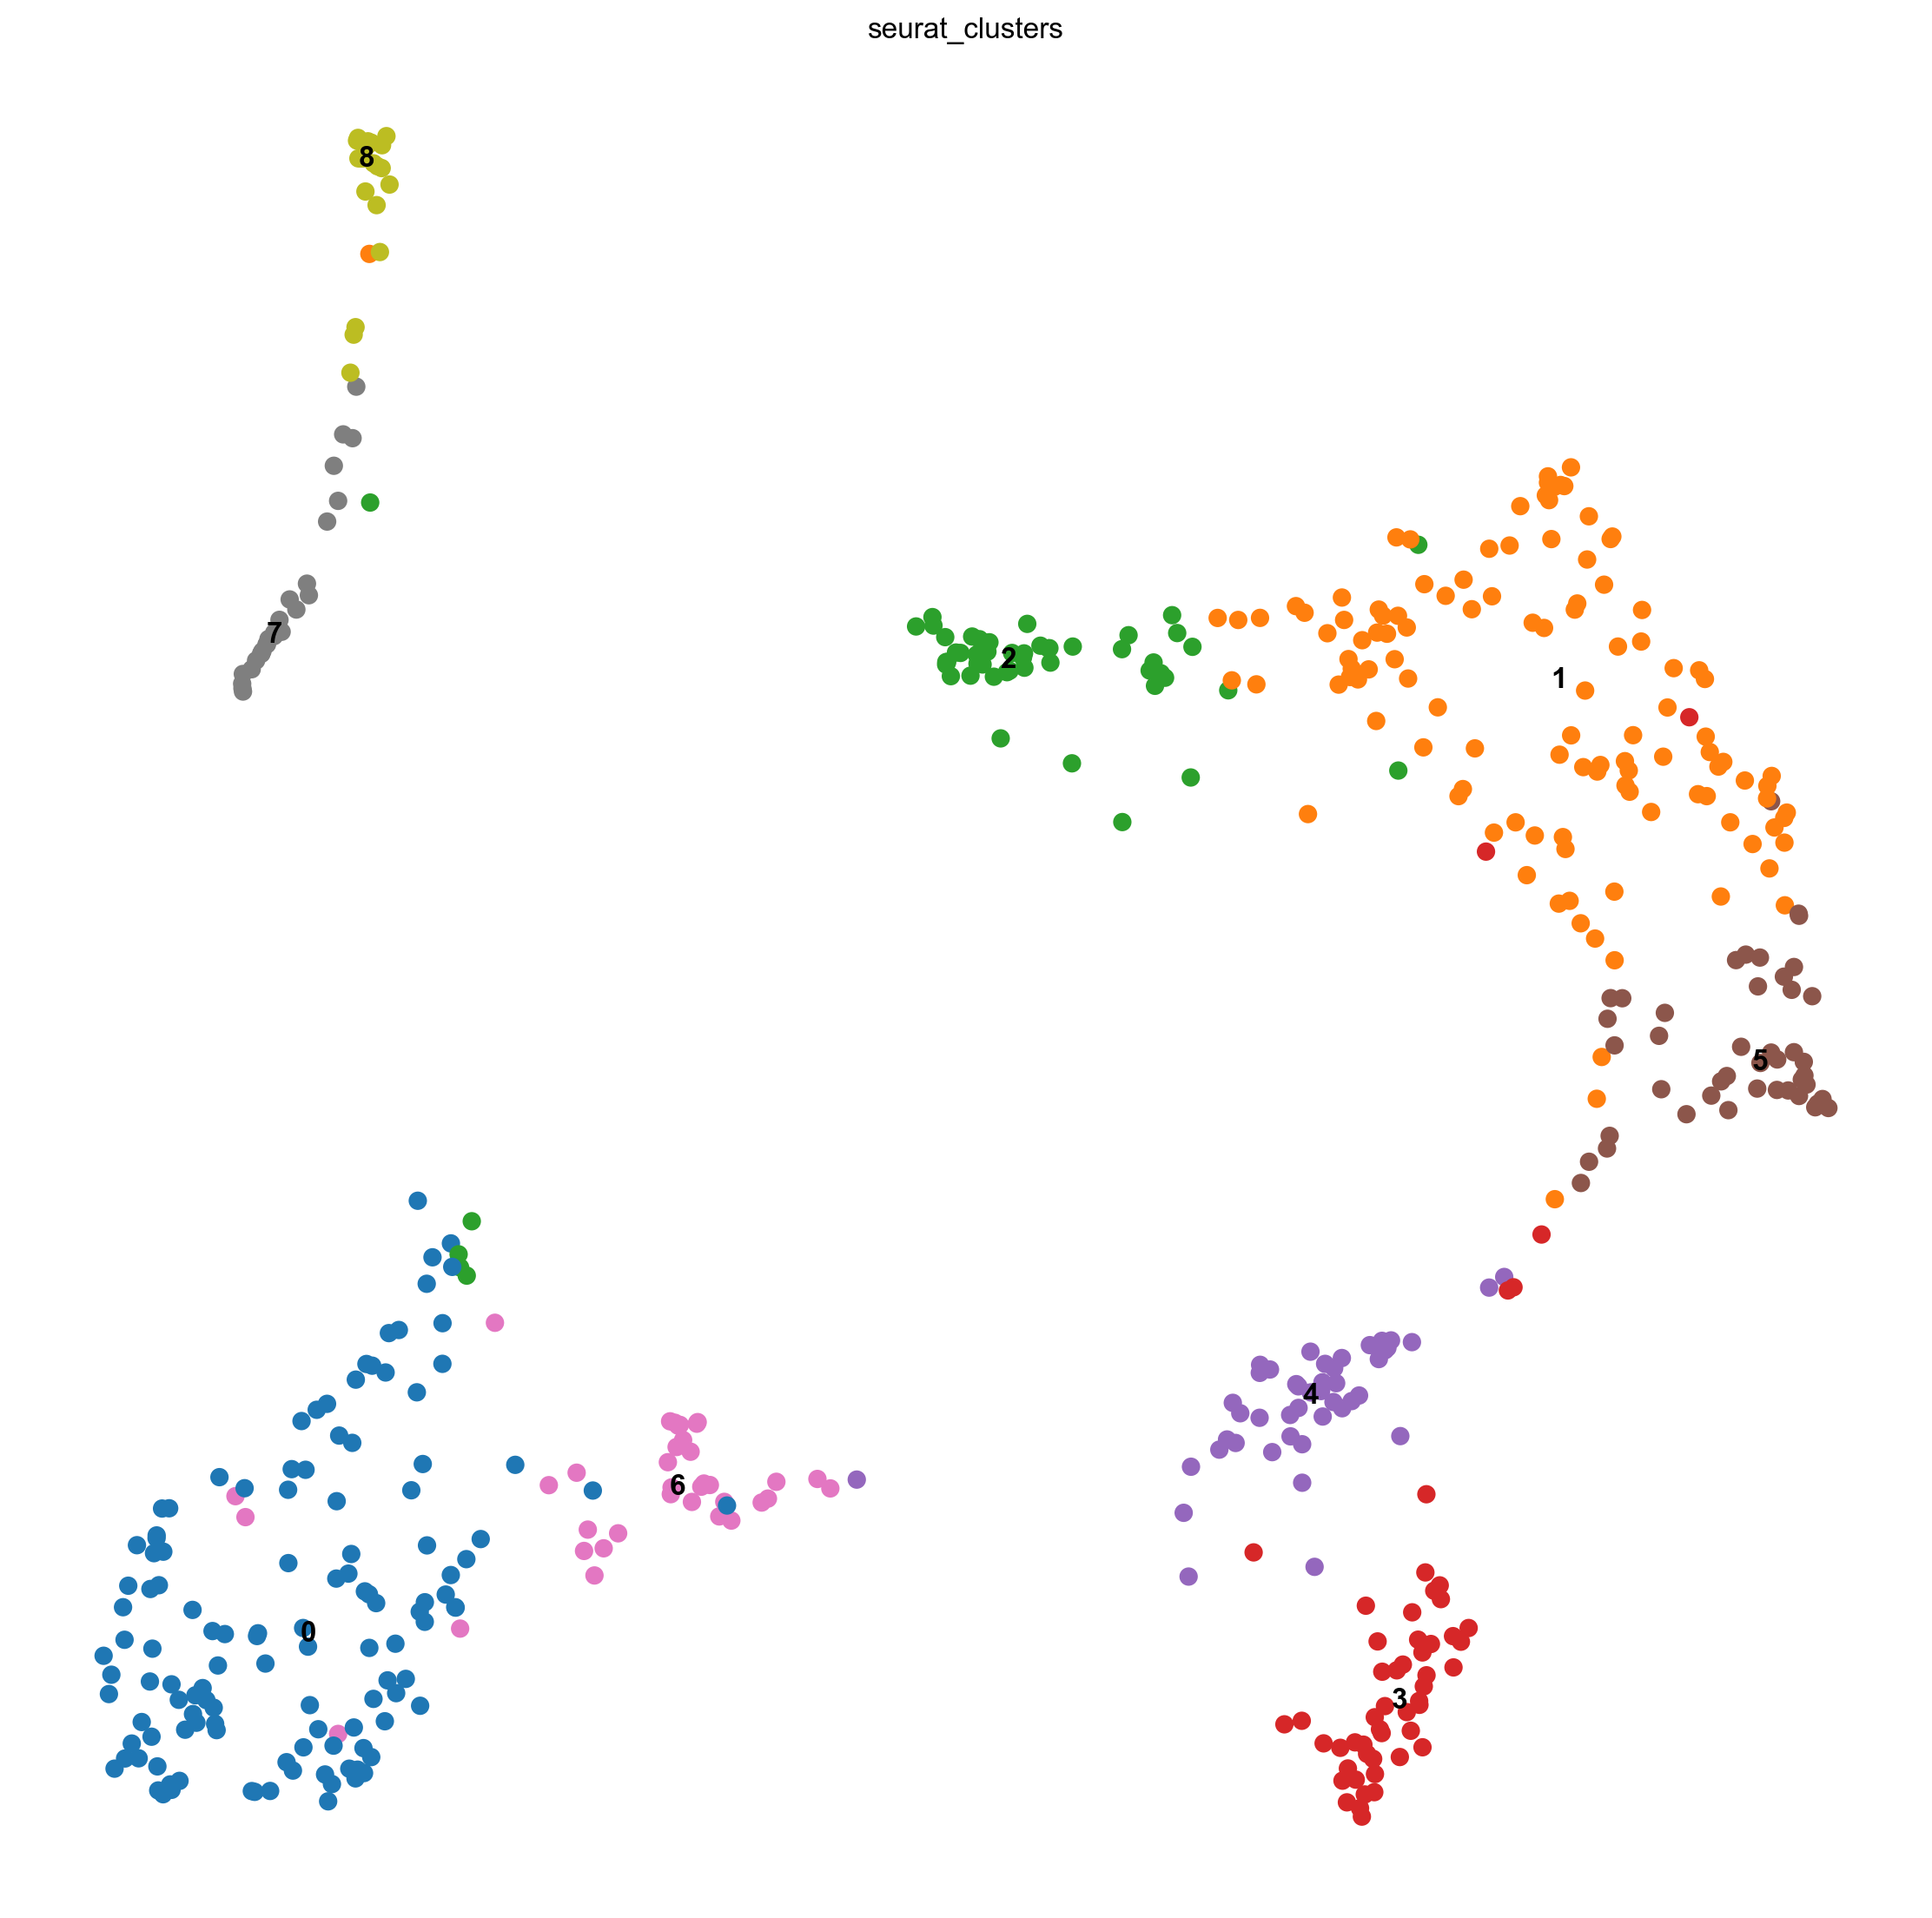

In [29]:
sc.pl.umap(adata, color='seurat_clusters', frameon=False, legend_loc='on data')

computing velocity embedding
    finished (0:00:00) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)
saving figure to file ./figures/scvelo_embedding.pdf


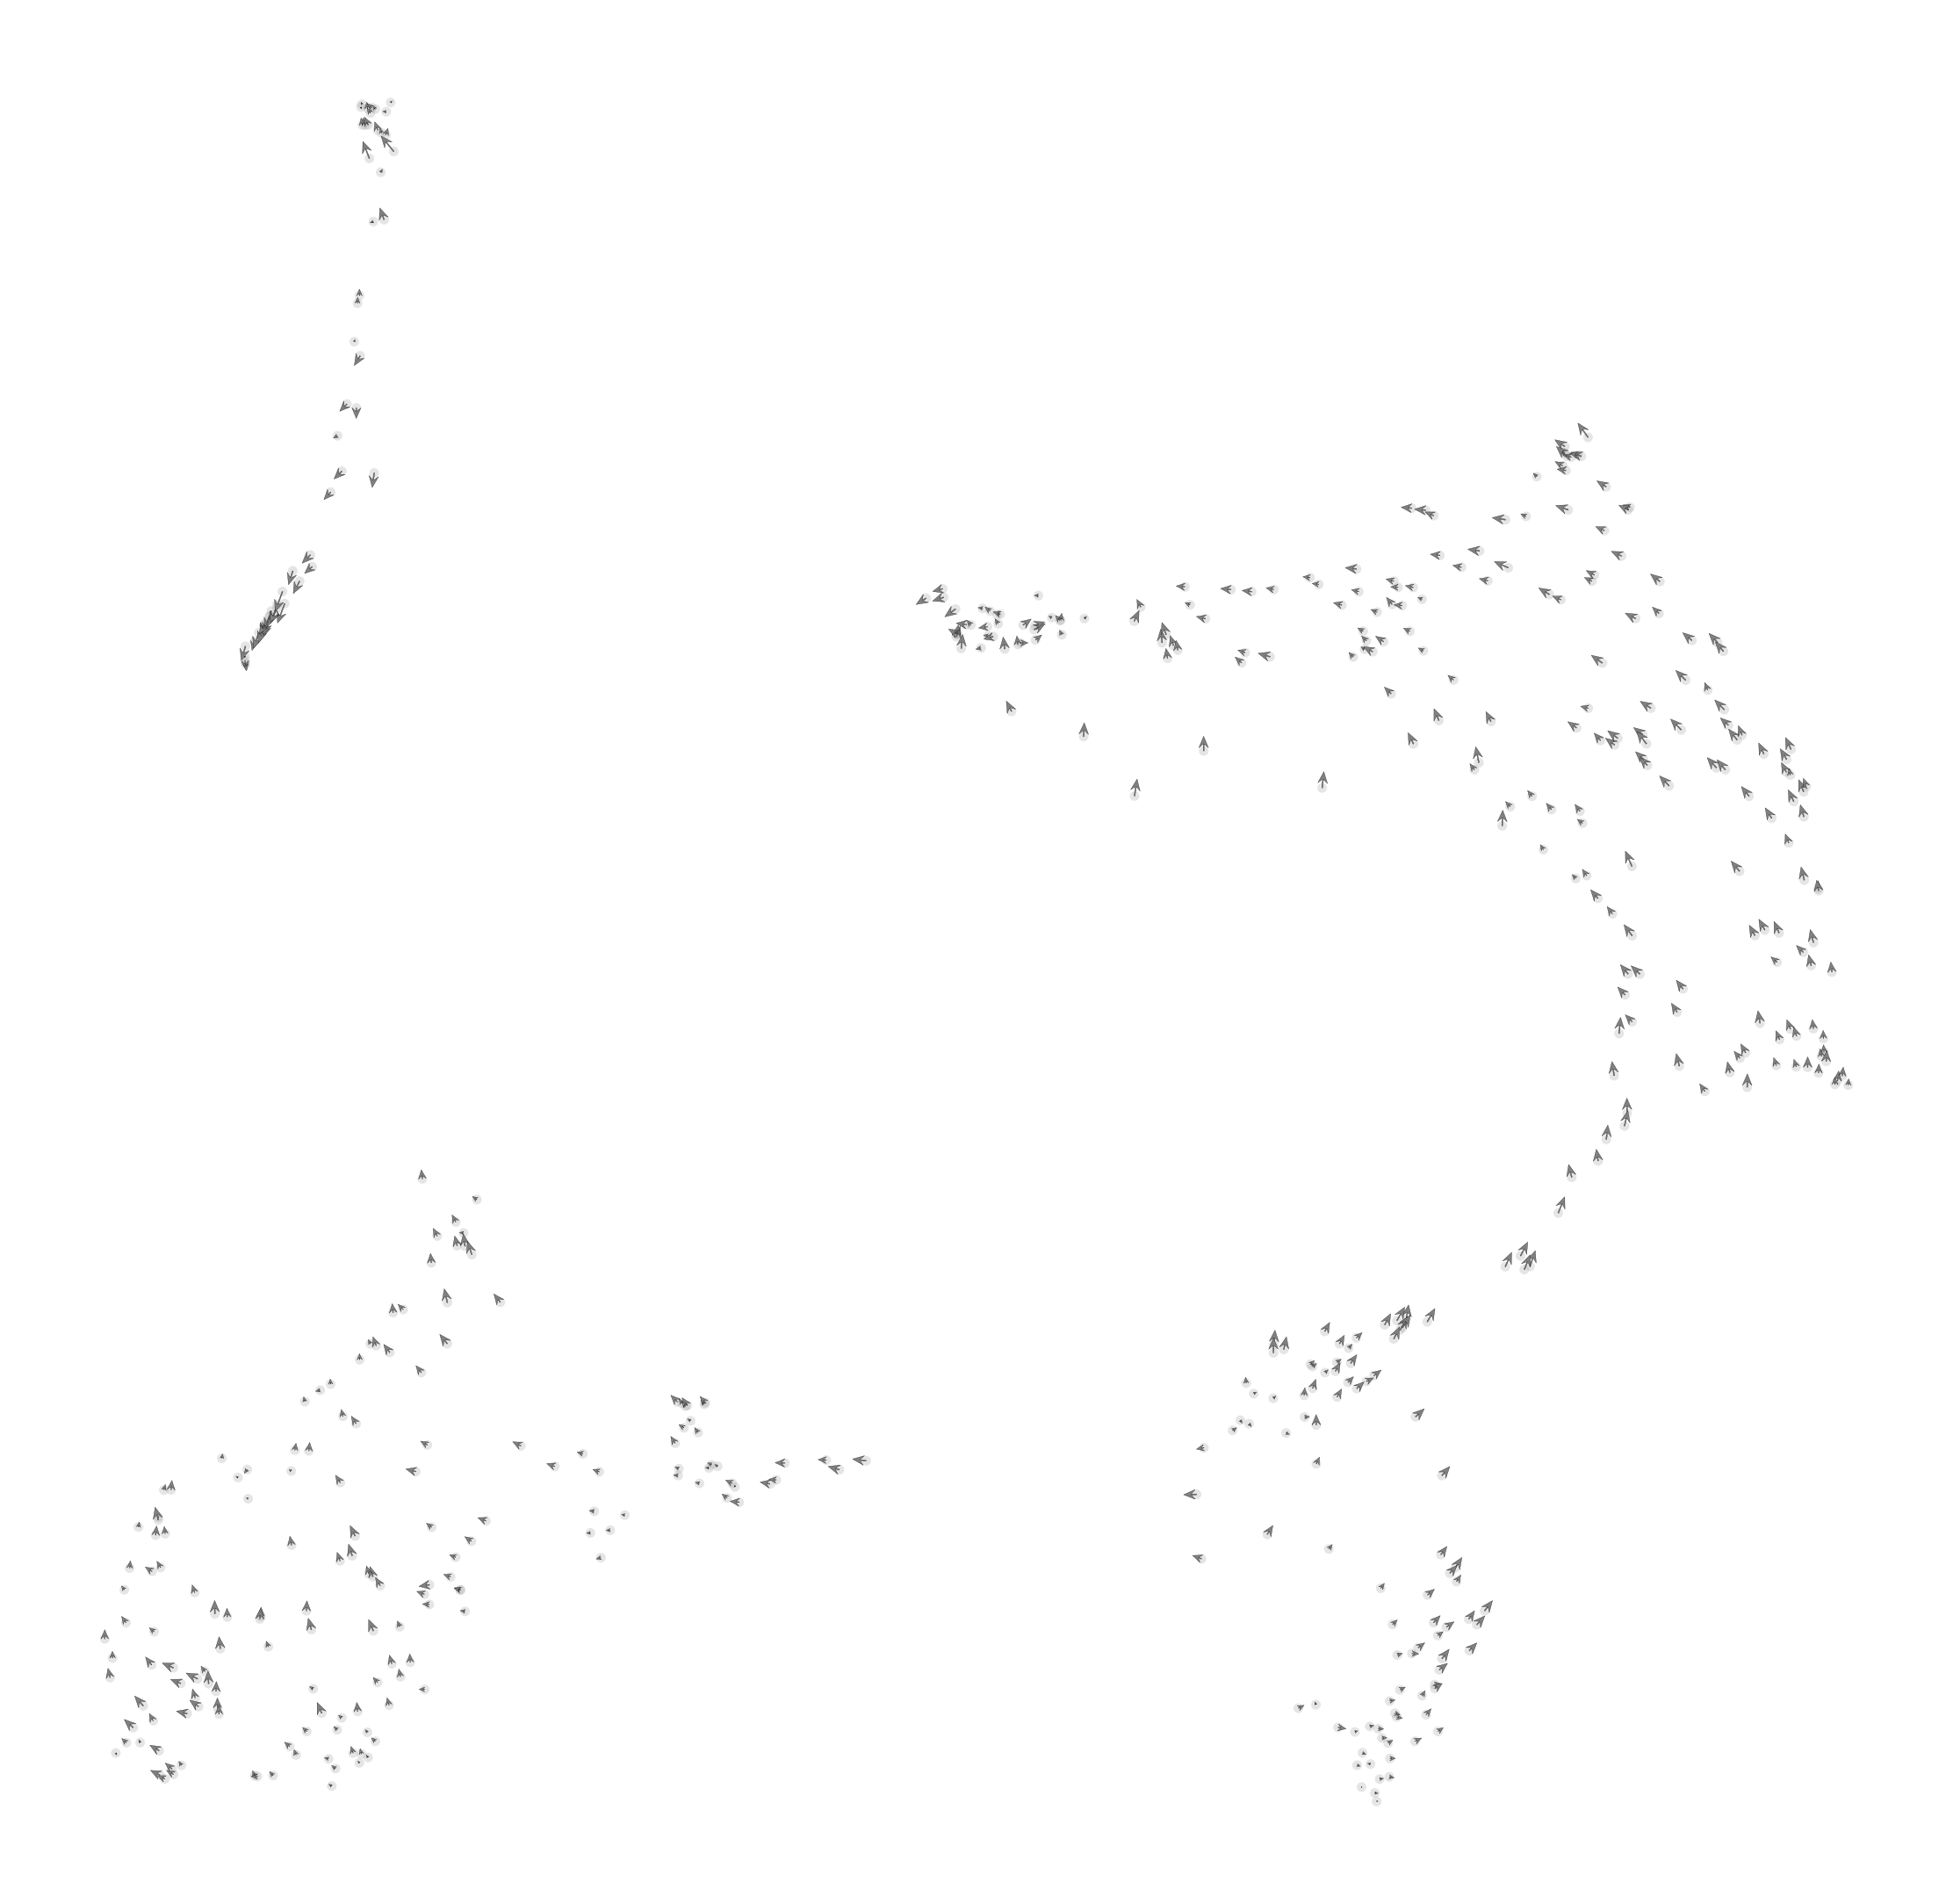

In [30]:
scv.pl.velocity_embedding(adata, basis='umap', frameon=False, save='embedding.pdf')

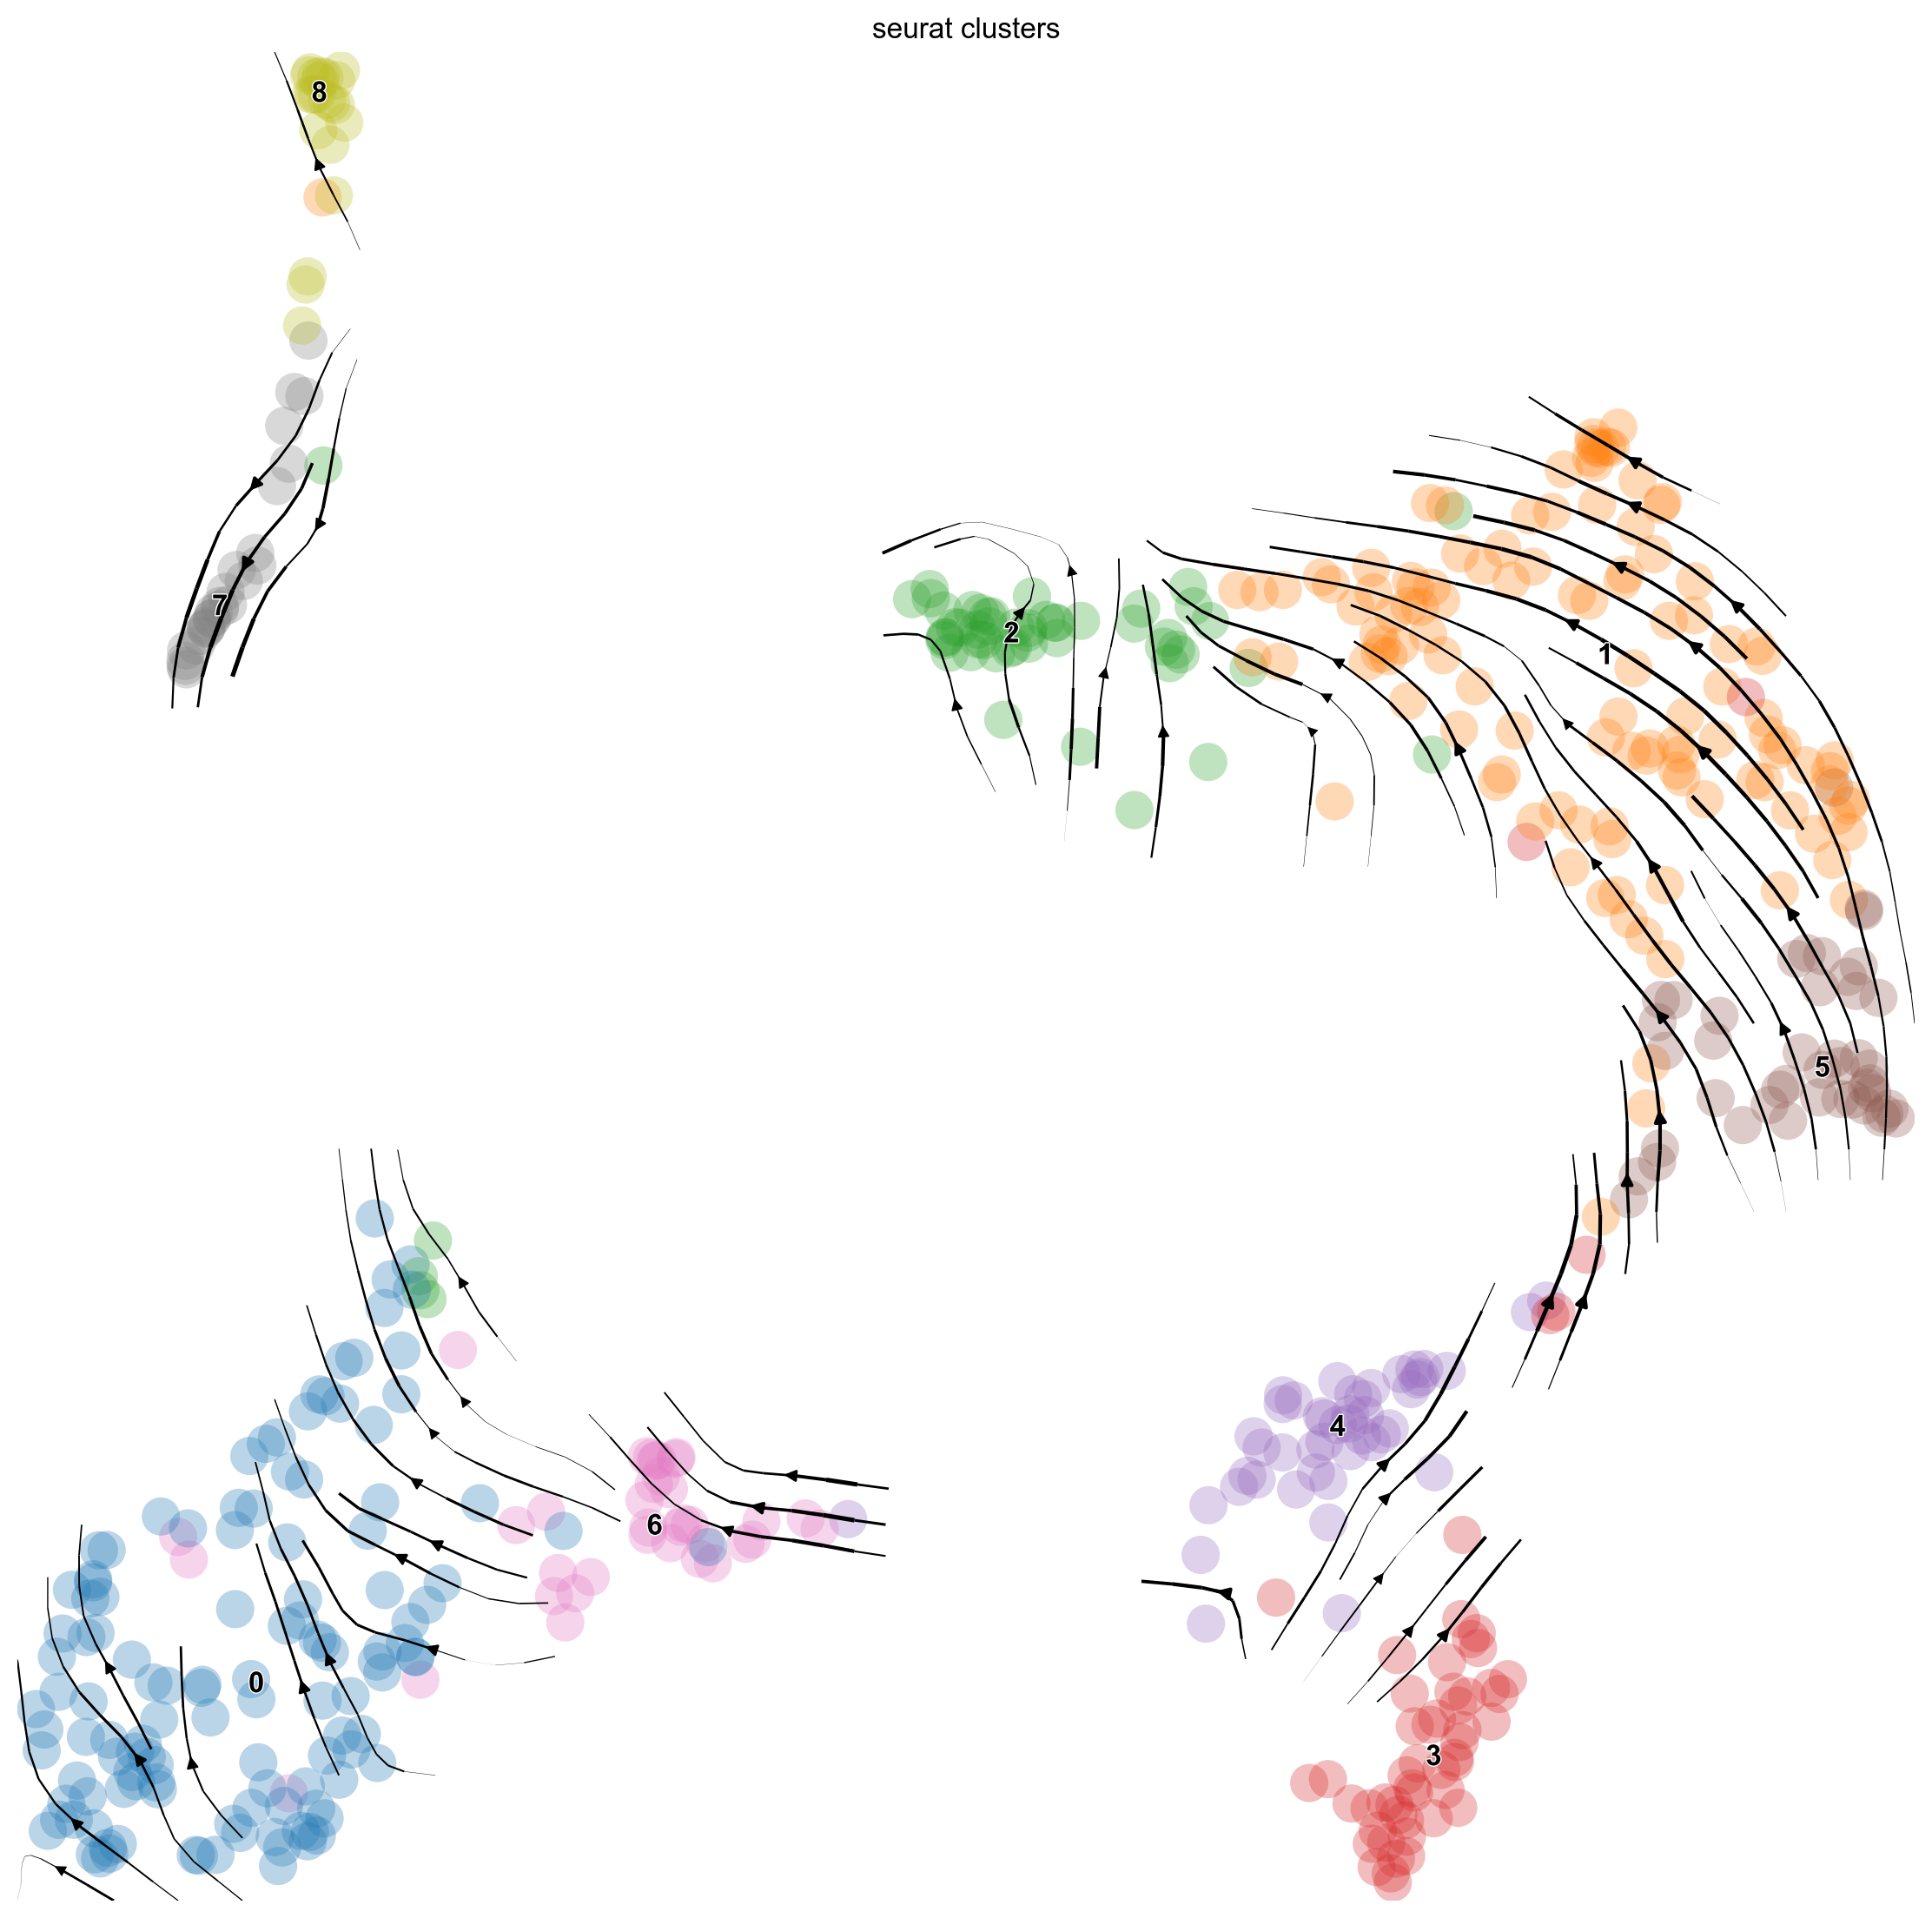

In [46]:
scv.pl.velocity_embedding_stream(adata, basis='umap', color='seurat_clusters')


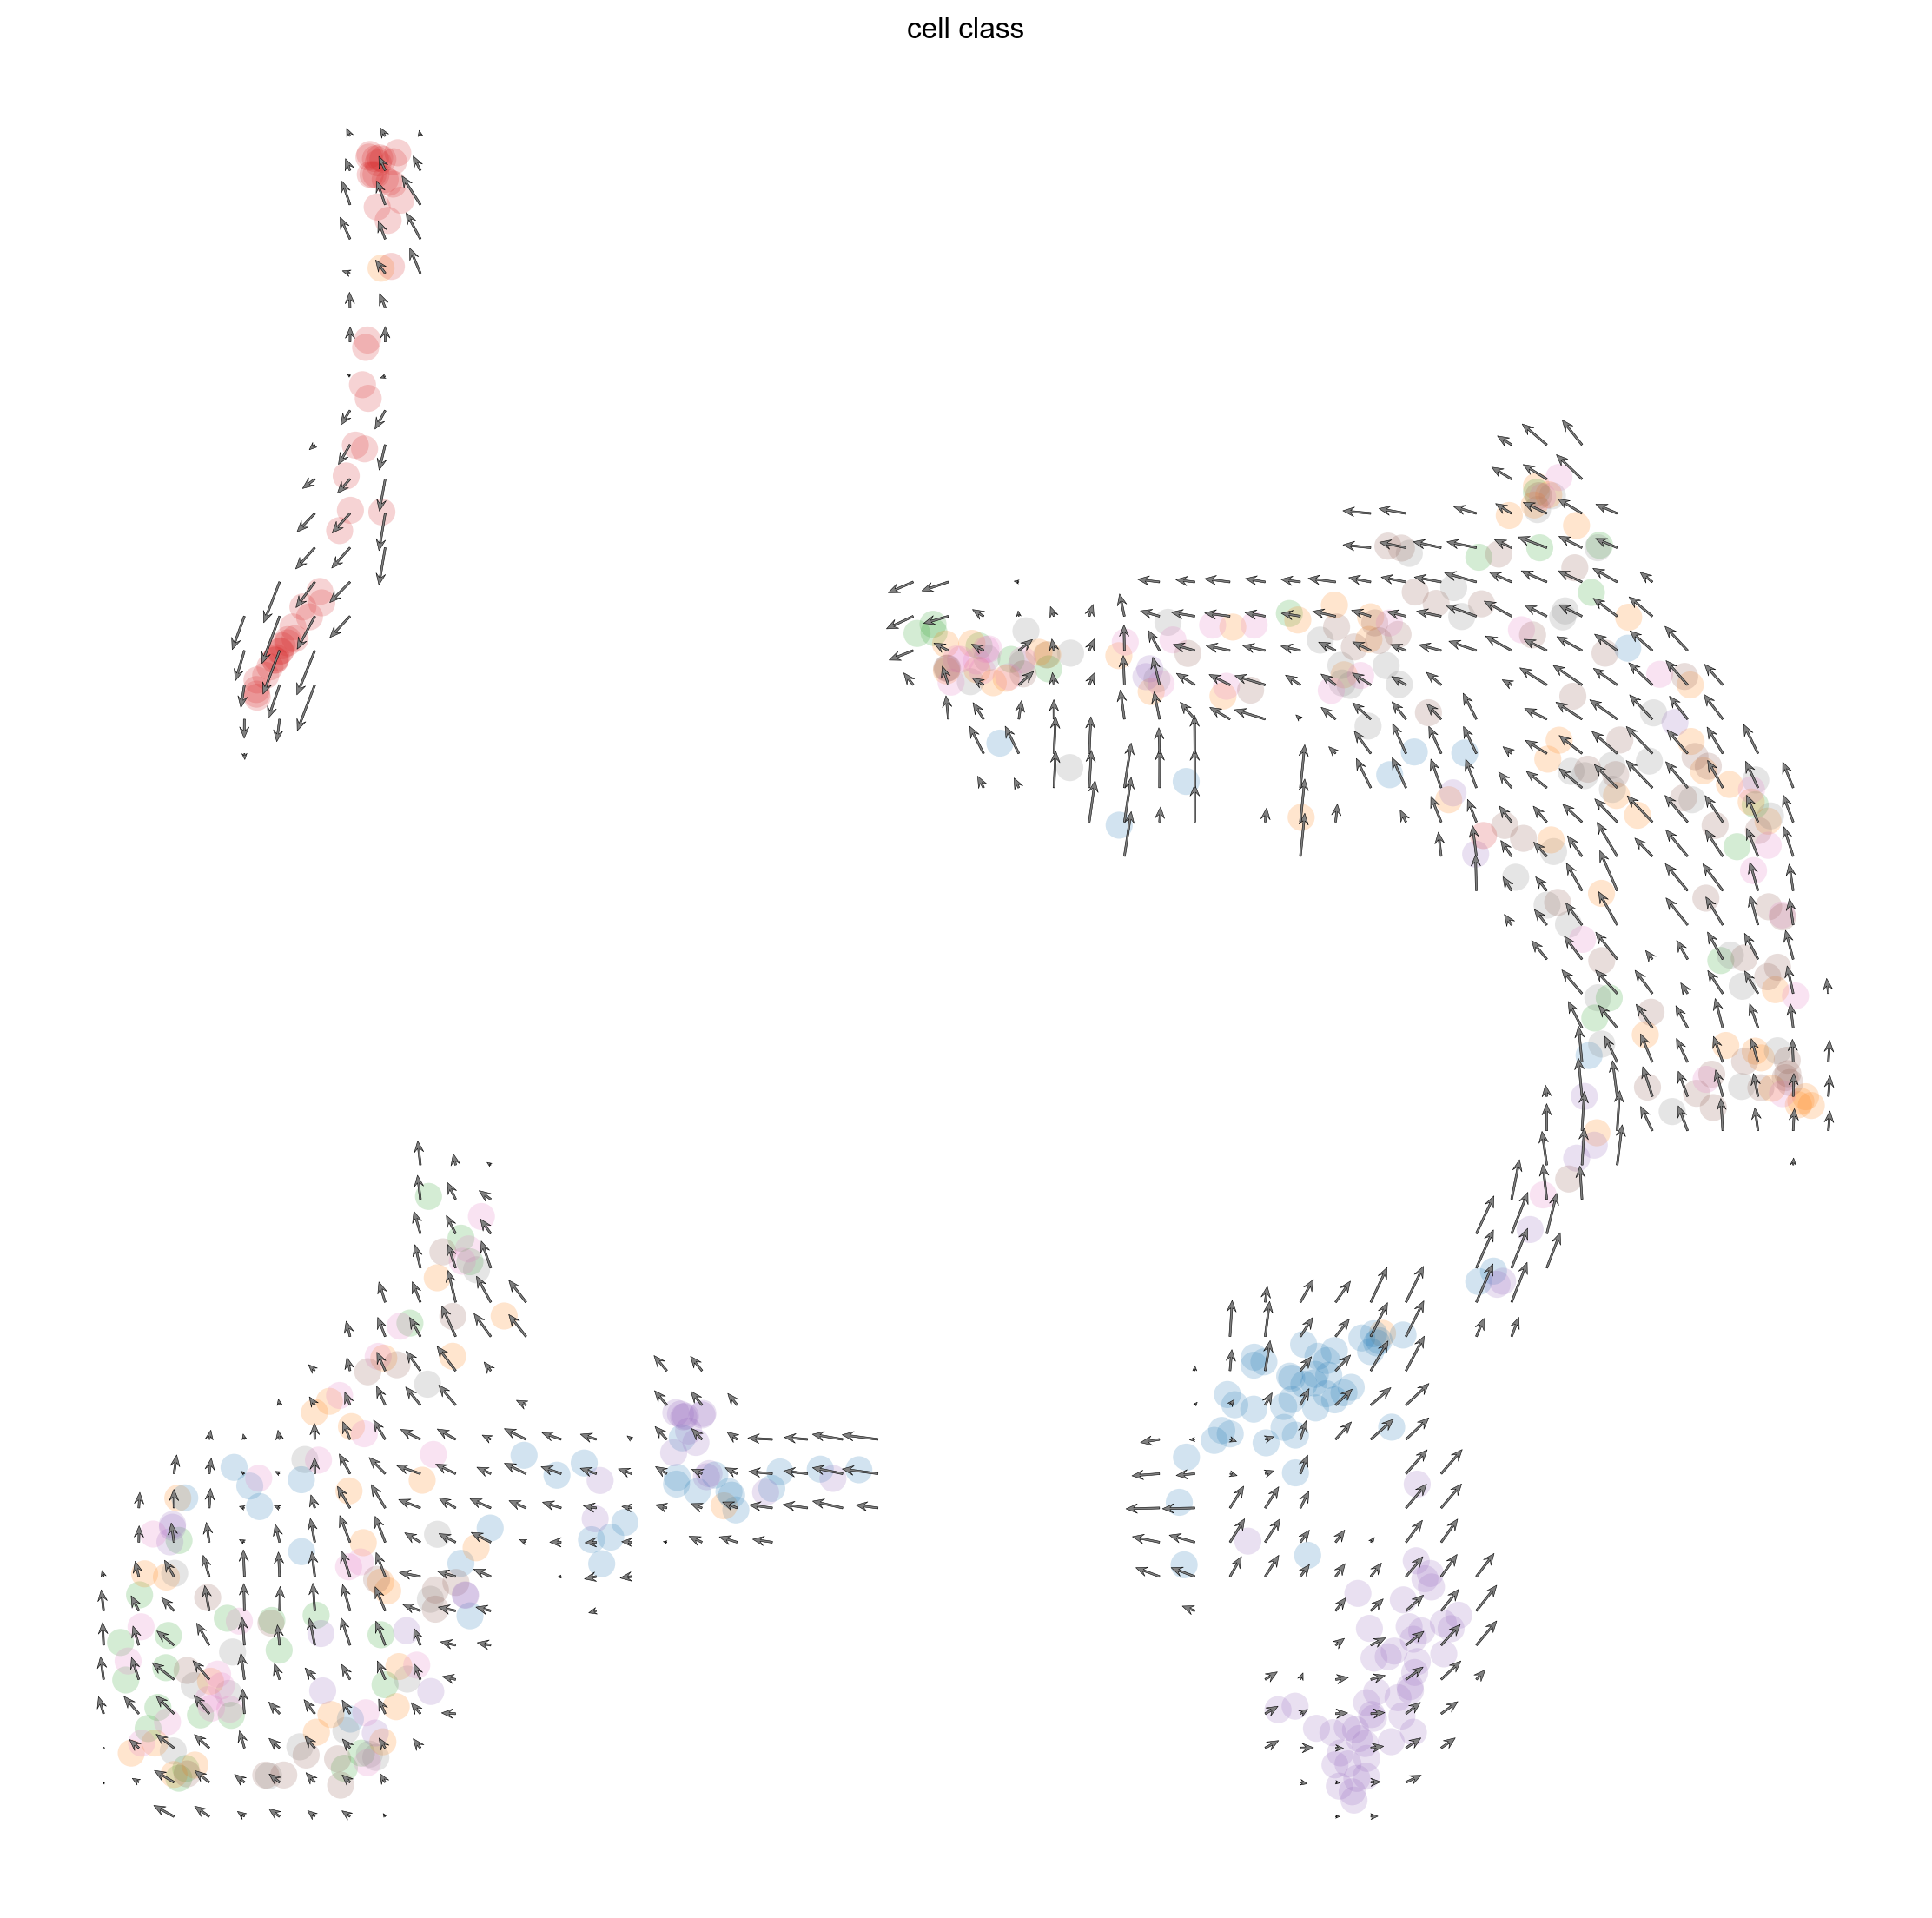

In [44]:
scv.pl.velocity_embedding_grid(adata, basis='umap', color='cell_class', scale= 0.35)

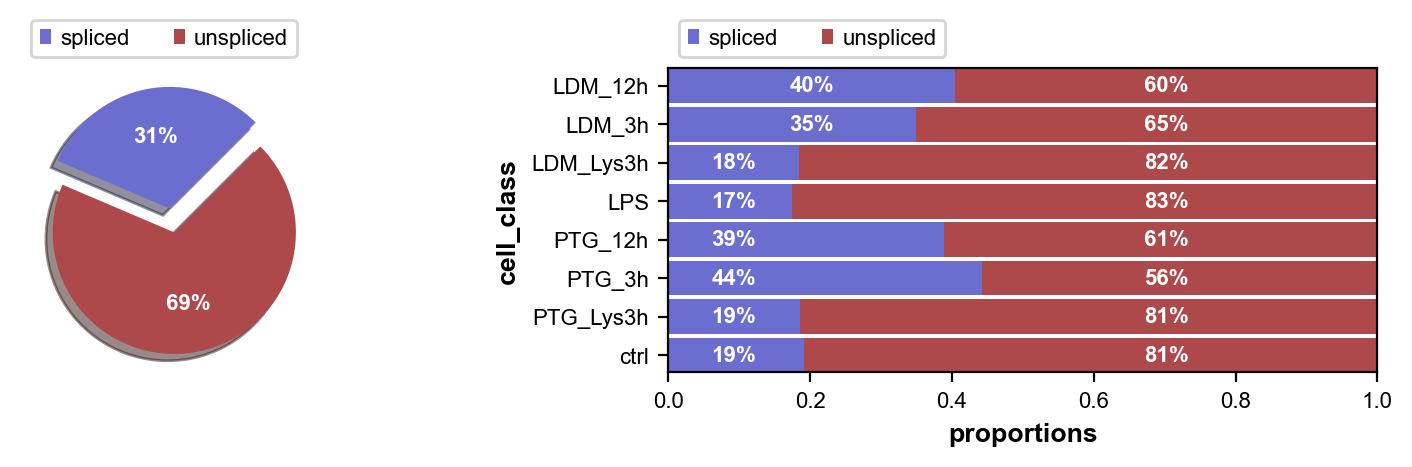

In [36]:
scv.pl.proportions(adata, groupby= "cell_class")

In [37]:
#check whether the difference is signficant : binomial test?

<function scvelo.plotting.proportions.proportions(adata, groupby='clusters', layers=None, highlight='unspliced', add_labels_pie=True, add_labels_bar=True, fontsize=8, figsize=(10, 2), dpi=100, use_raw=True, show=True, save=None)>

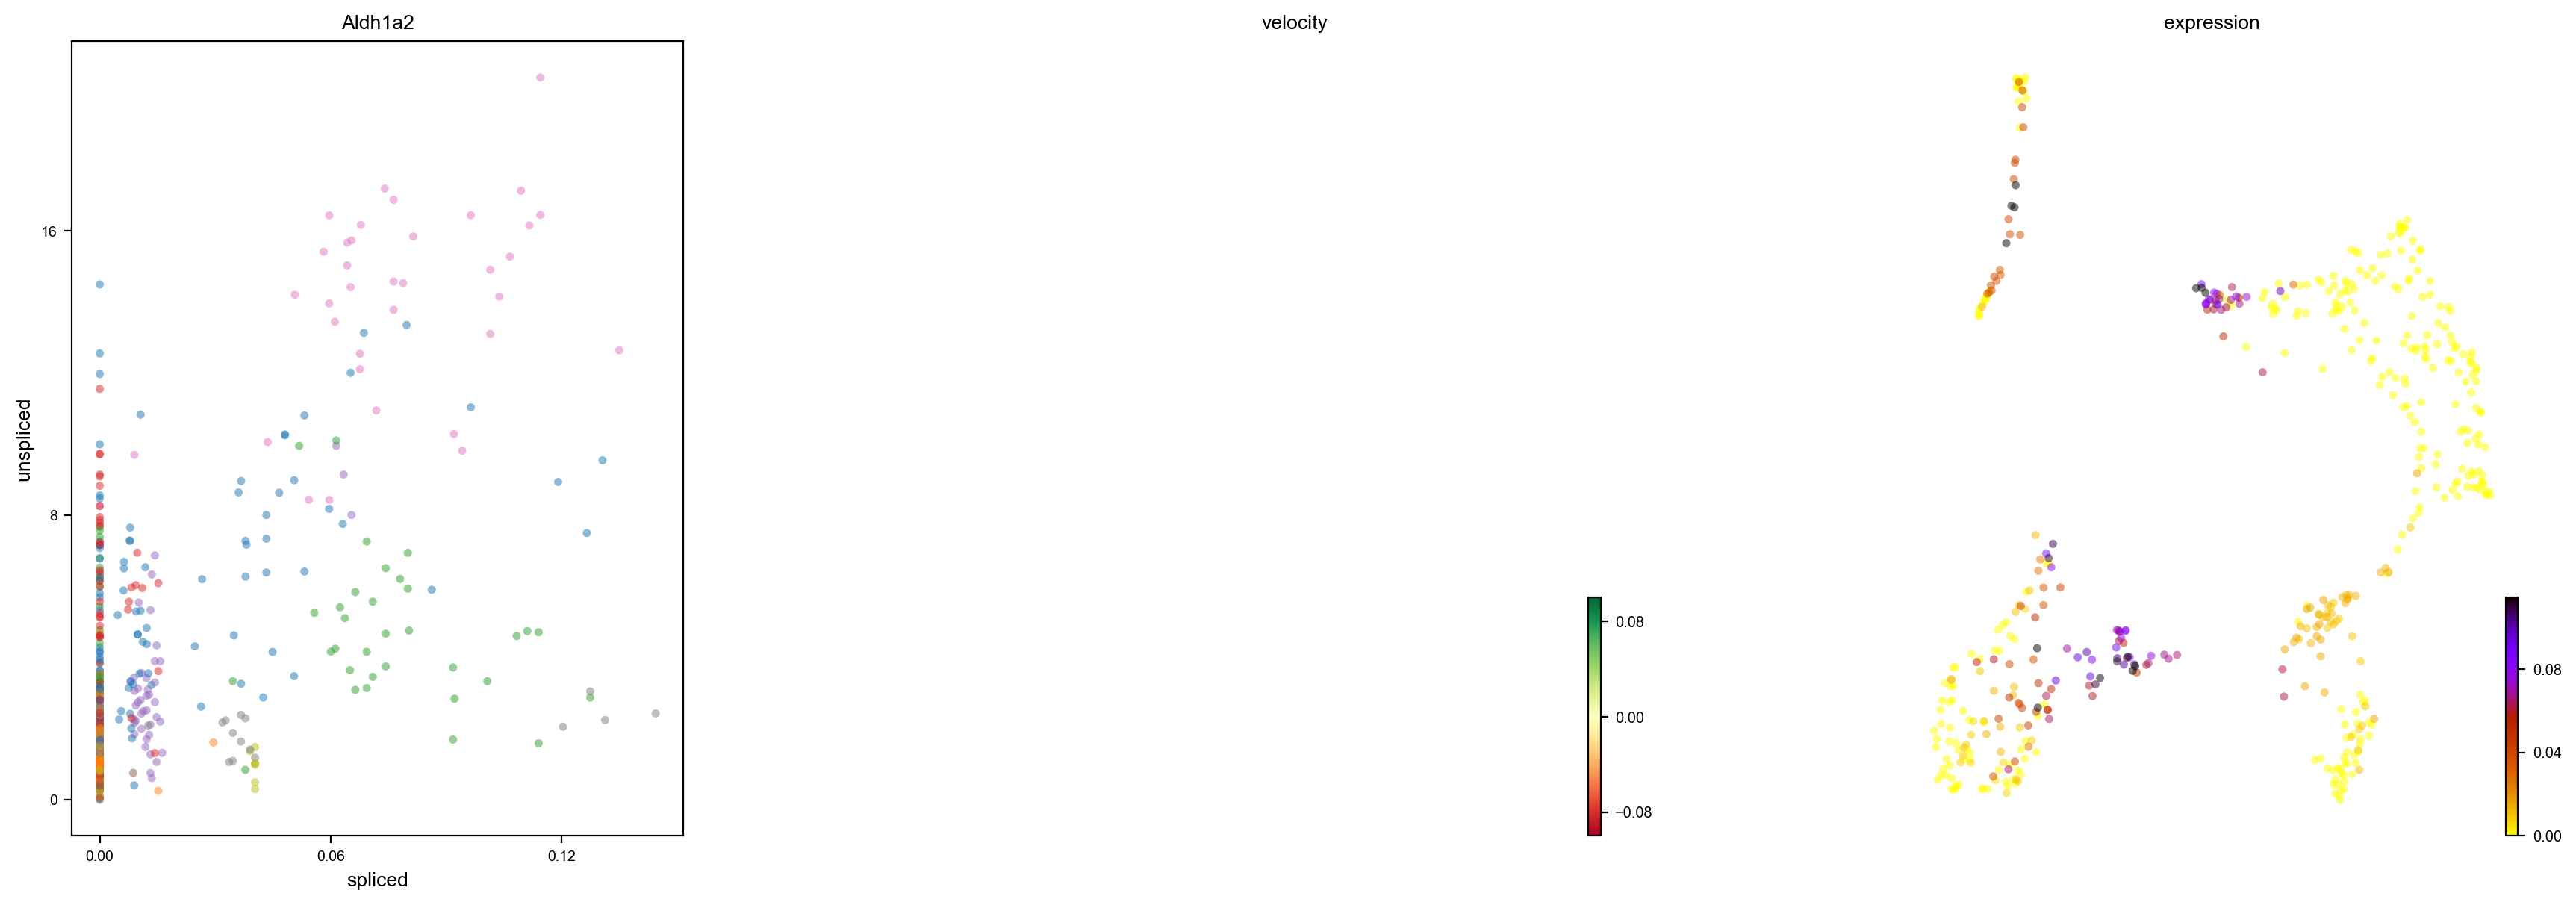

In [37]:
# plot velocity of a selected gene
scv.pl.velocity(adata, var_names=['Aldh1a2'], color='seurat_clusters')

In [102]:
#Downstream analysis 
scv.tl.rank_velocity_genes(adata, groupby='seurat_clusters', min_corr=.3)
df = scv.DataFrame(adata.uns['rank_velocity_genes']['names'])
df.head()

ranking velocity genes
    finished (0:00:00) --> added 
    'rank_velocity_genes', sorted scores by group ids (adata.uns) 
    'spearmans_score', spearmans correlation scores (adata.var)


0         1        2        3       4              5       6  \
0   S100a16     Ddost     Nme9   Zfp747    Musk  1600029O15Rik  Ppp1r7   
1    Neurl2   Gm45584    Sarm1    Ssrp1    Eprs            Plg  Gm9745   
2        Cs    Stard4     Lhx9     Zfp9   Mosmo            A2m    Lix1   
3  Serpinf1       Lbp    Adad1    Hdac3  Cep164           Det1    Mtm1   
4    Tnrc18  Ceacam10  Slc15a3  Hsd17b4    Nme8           Mxd1  Sec61b   

          7        8  
0      Txn1  Gm50260  
1   Gm50260  Gm10501  
2  Arhgap27     Cct2  
3    Apol9b      Cbs  
4      Git1   Cfap73

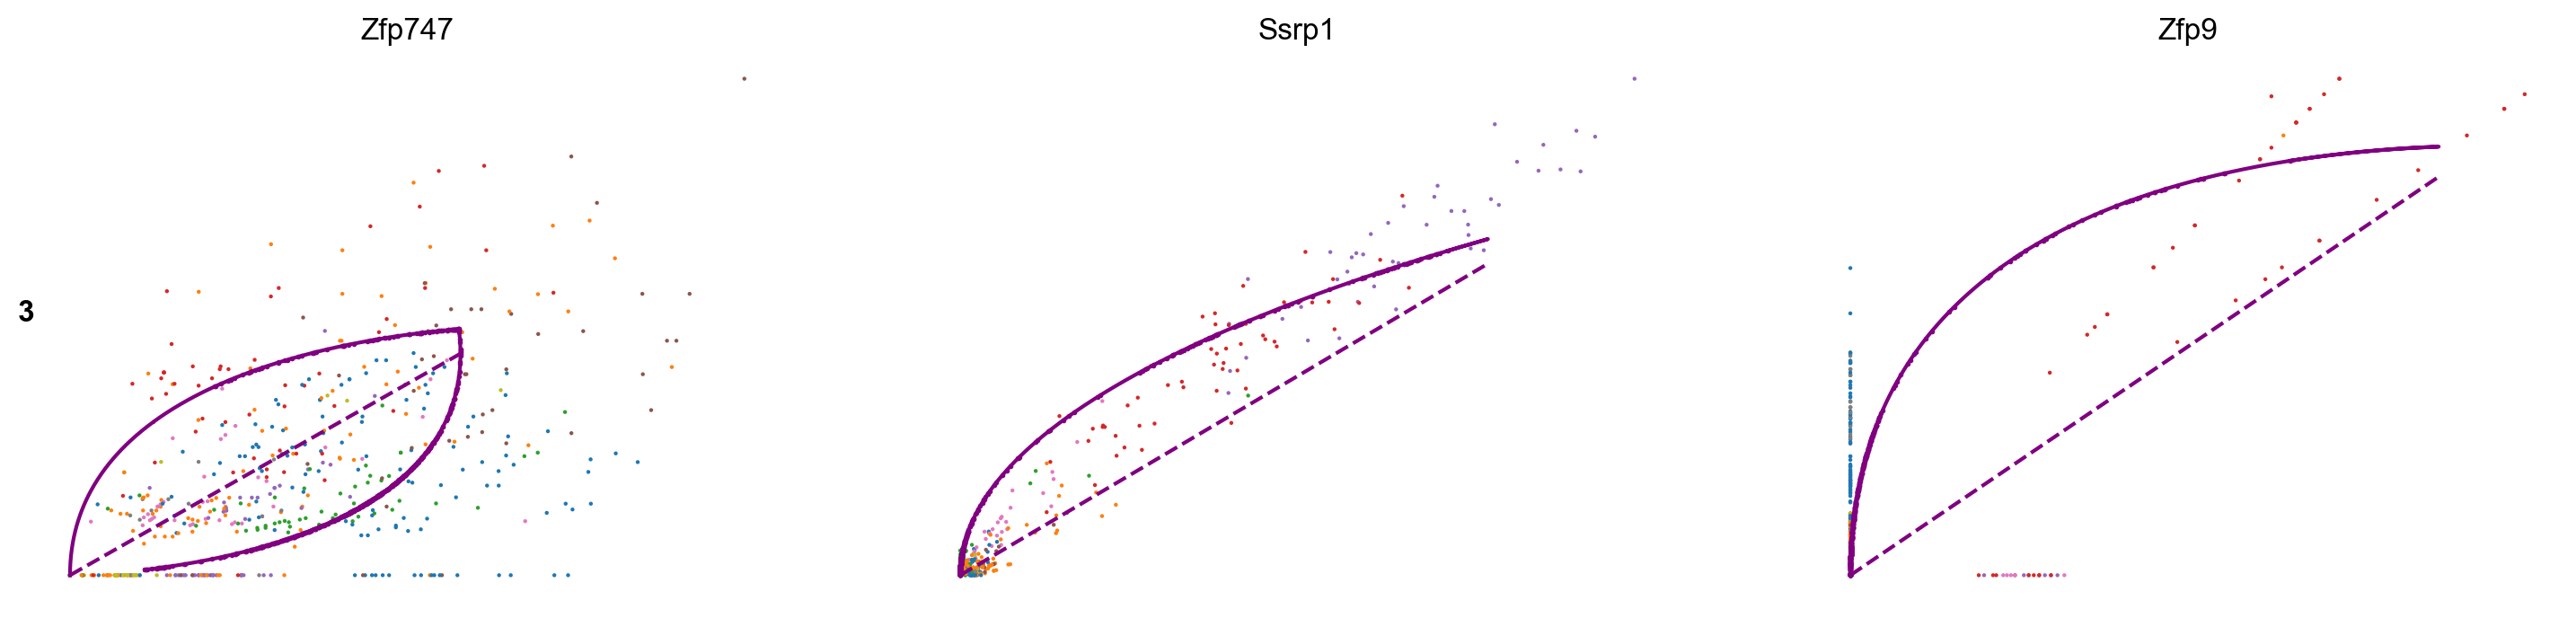

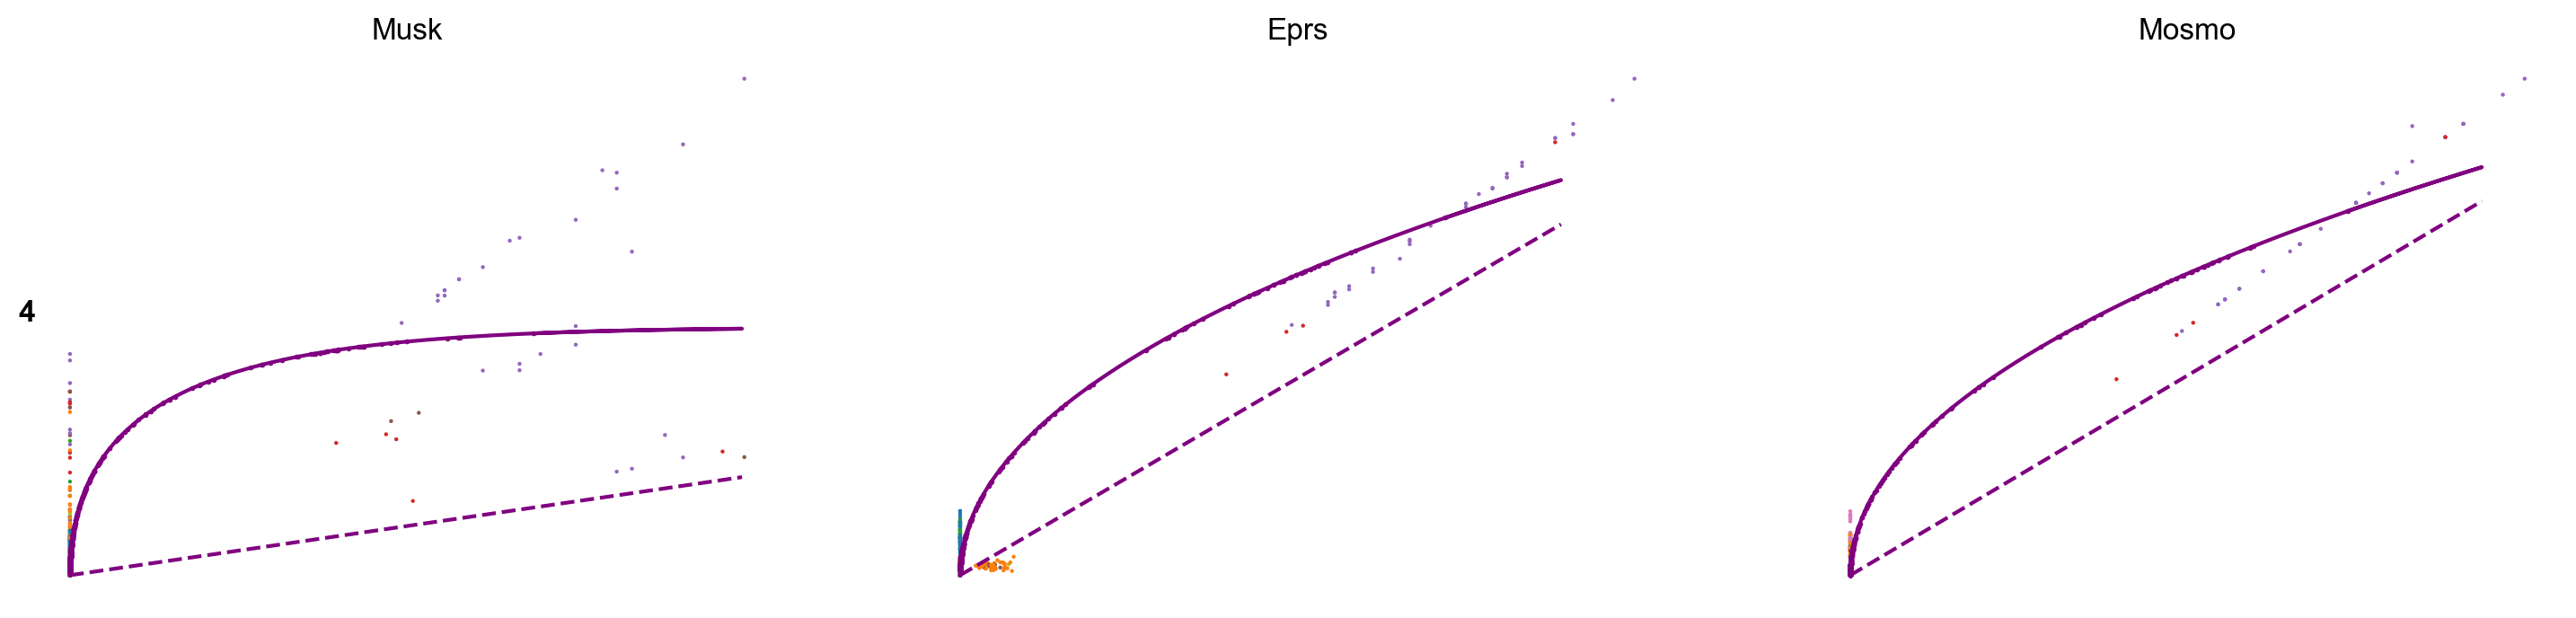

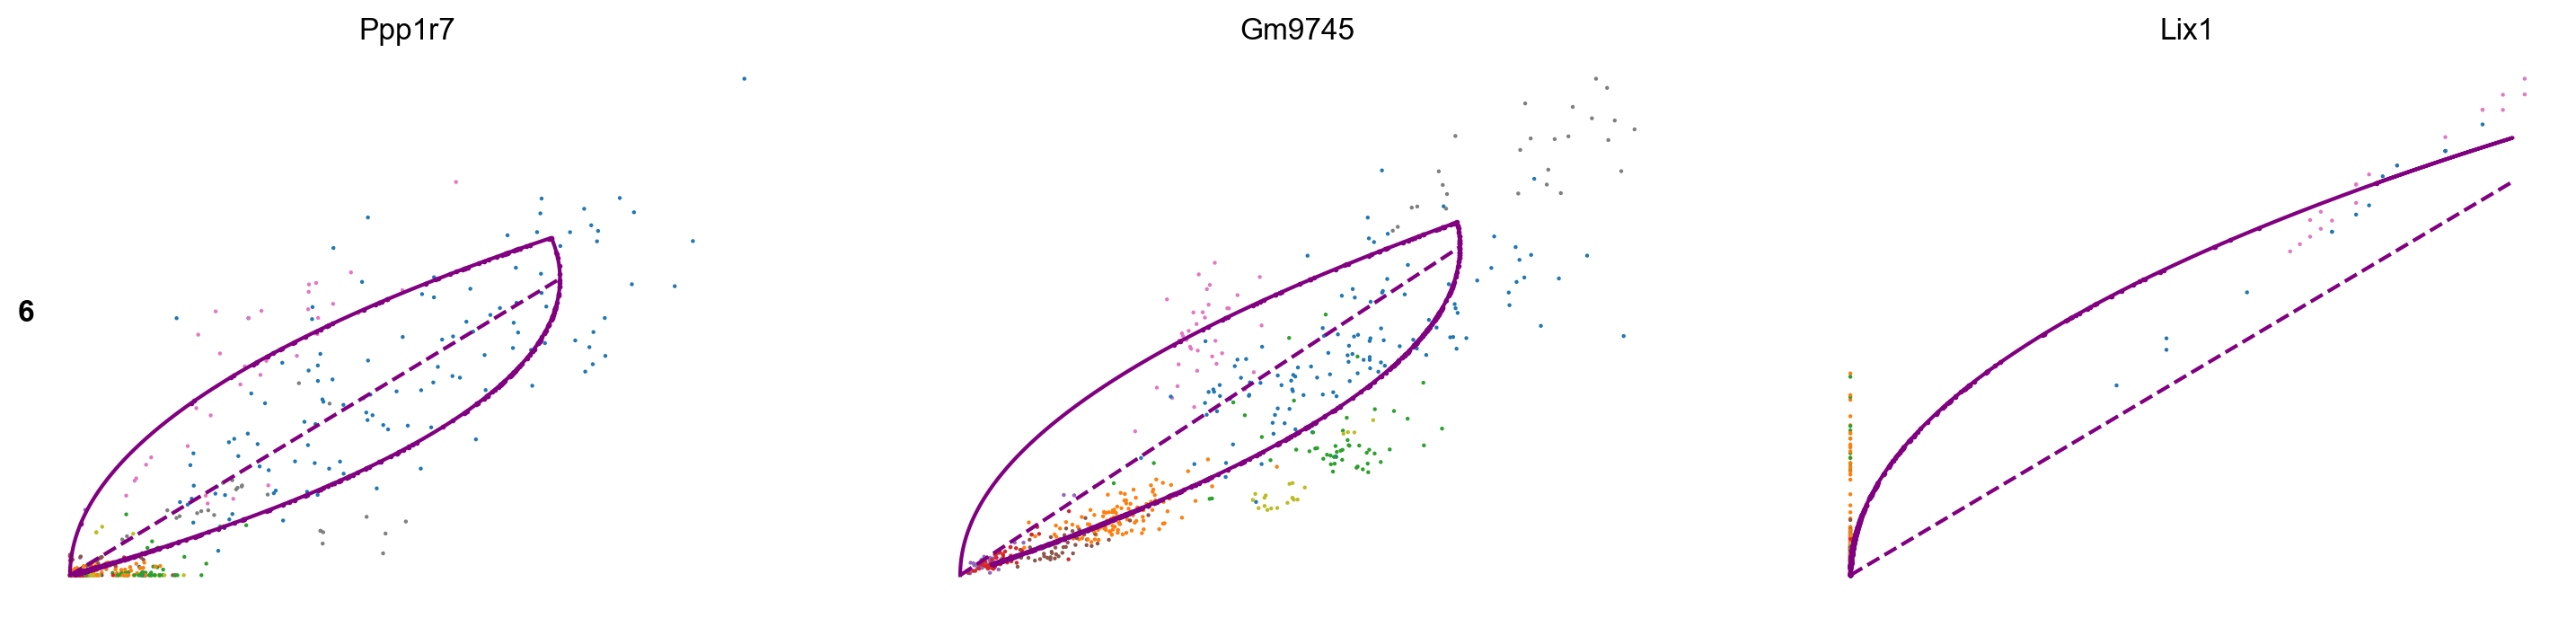

In [106]:
kwargs = dict(frameon=False, size=10, linewidth=1.5,
              add_outline='3, 4, 6')

scv.pl.scatter(adata, df['3'][:3], ylabel='3', frameon=False, color='seurat_clusters', size=10, linewidth=1.5)
scv.pl.scatter(adata, df['4'][:3], ylabel='4', frameon=False, color='seurat_clusters', size=10, linewidth=1.5)
scv.pl.scatter(adata, df['6'][:3], ylabel='6', frameon=False, color='seurat_clusters', size=10, linewidth=1.5)


--> added 'velocity_length' (adata.obs)
--> added 'velocity_confidence' (adata.obs)
--> added 'velocity_confidence_transition' (adata.obs)


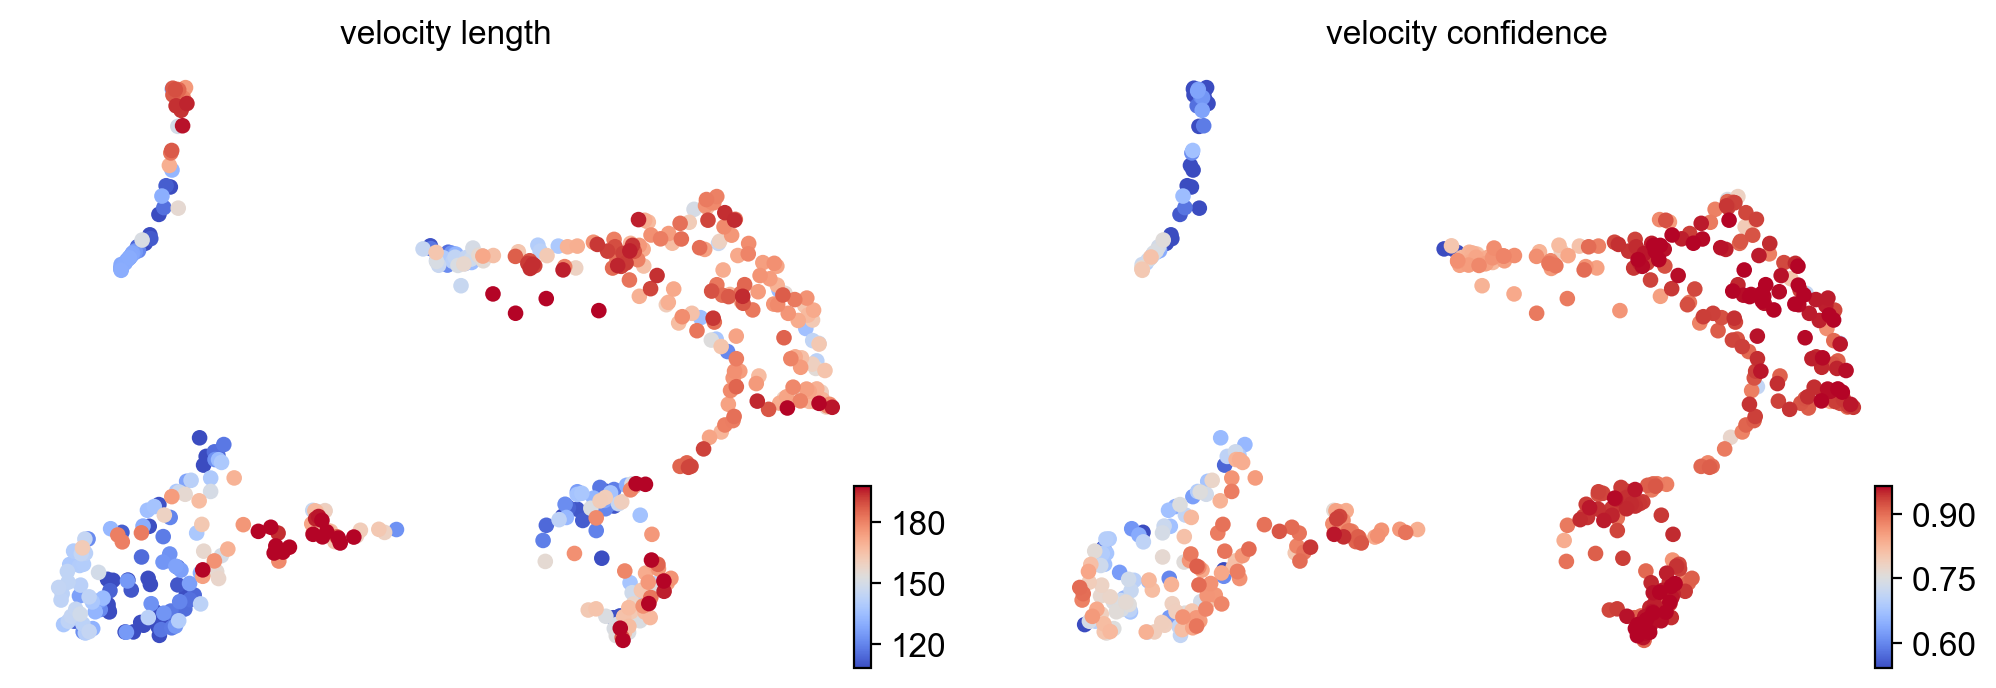

In [107]:
scv.tl.velocity_confidence(adata)
keys = 'velocity_length', 'velocity_confidence'
scv.pl.scatter(adata, c=keys, cmap='coolwarm', perc=[5, 95])

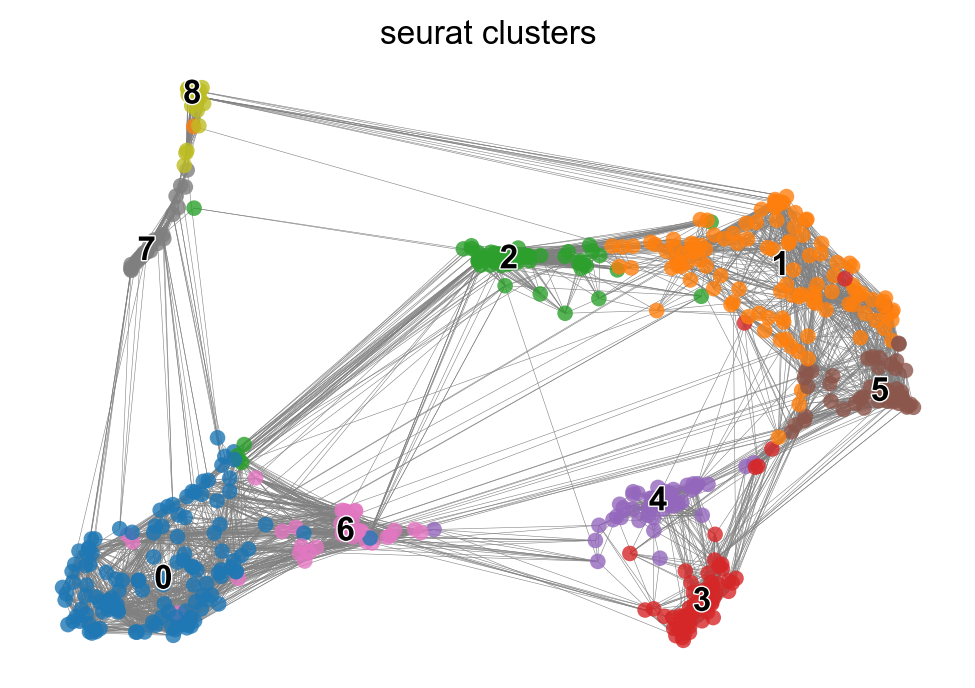

In [108]:
scv.pl.velocity_graph(adata, threshold=.1, color='seurat_clusters')


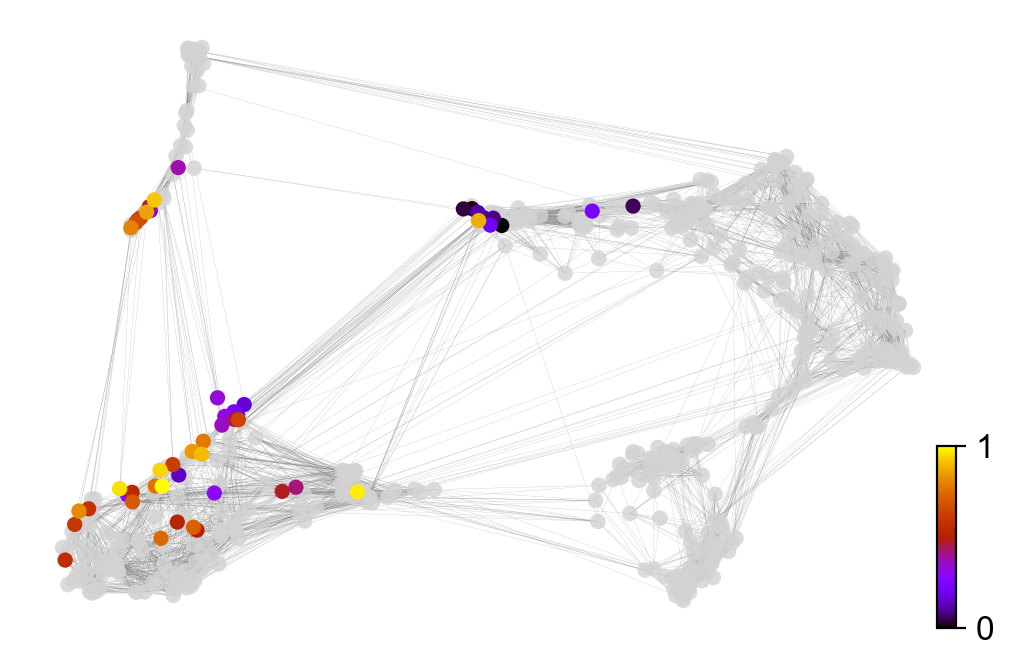

In [113]:
x, y = scv.utils.get_cell_transitions(adata, basis='umap', starting_cell=70)
ax = scv.pl.velocity_graph(adata, c='lightgrey', edge_width=.05, show=False)
ax = scv.pl.scatter(adata, x=x, y=y, s=120, c='ascending', cmap='gnuplot', ax=ax)


computing terminal states
    identified 0 region of root cells and 1 region of end points .
    finished (0:00:00) --> added
    'root_cells', root cells of Markov diffusion process (adata.obs)
    'end_points', end points of Markov diffusion process (adata.obs)


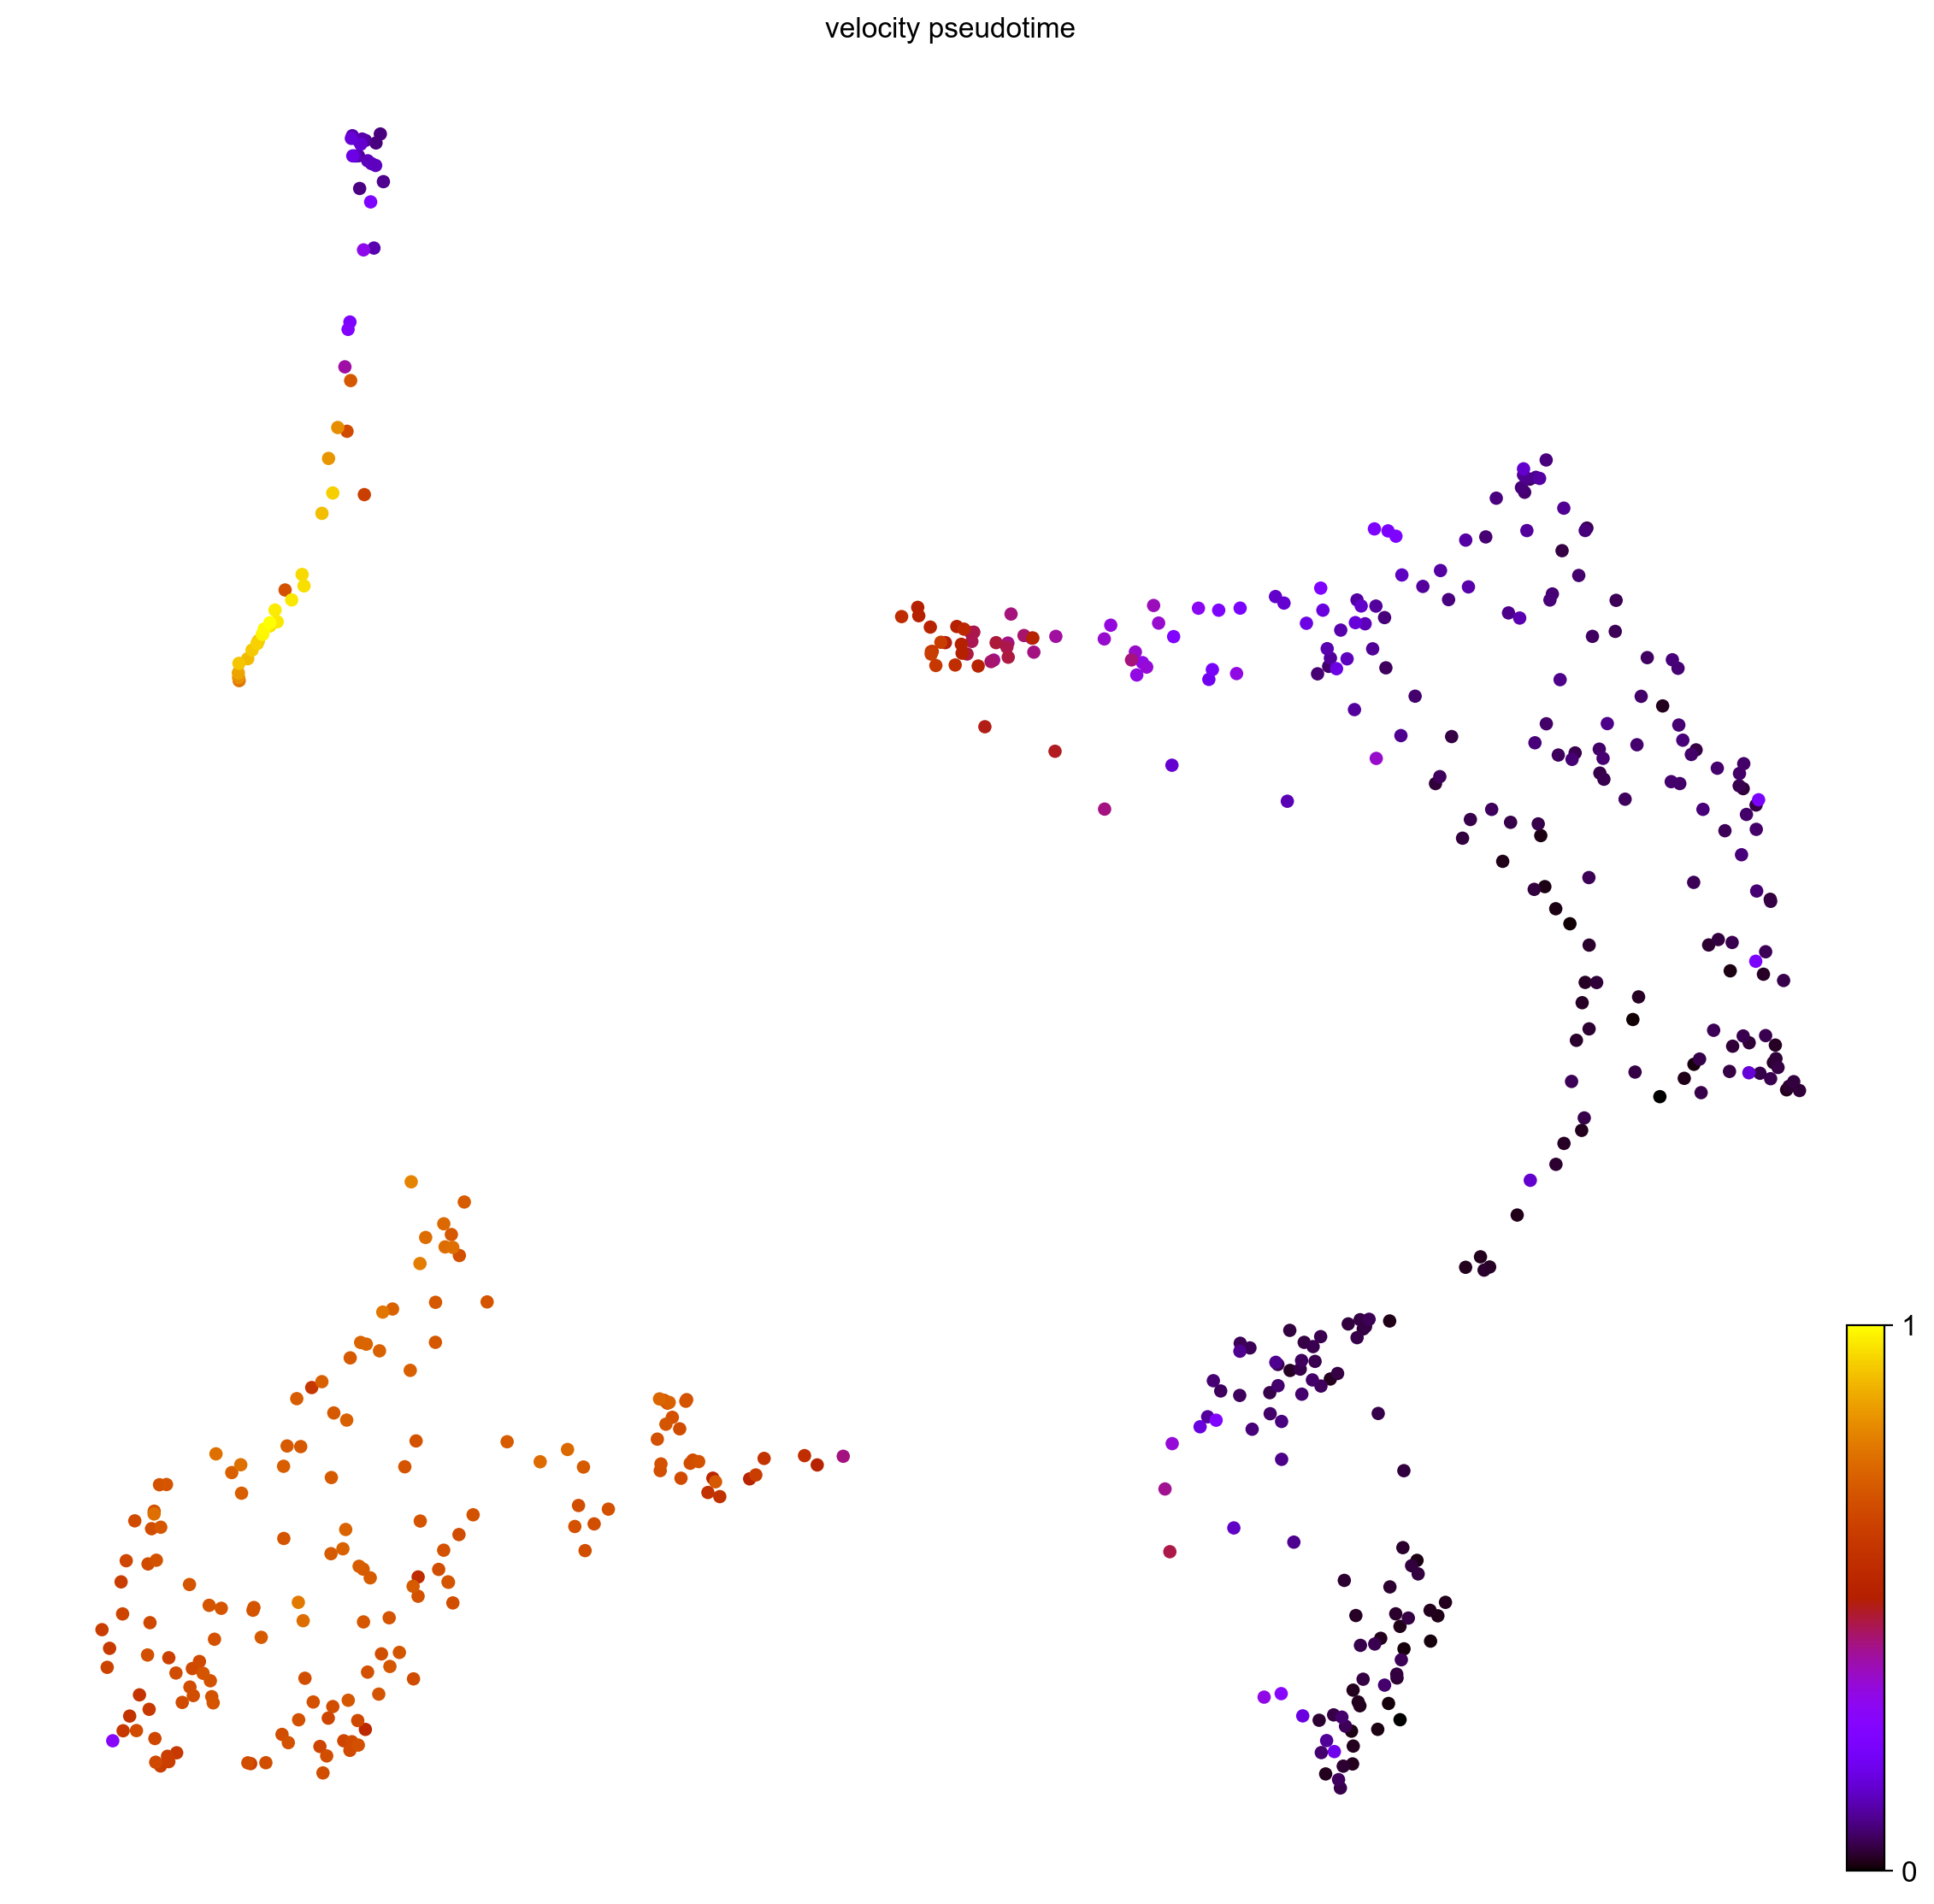

In [48]:
#pseudotime

scv.tl.velocity_pseudotime(adata)
scv.pl.scatter(adata, color='velocity_pseudotime', cmap='gnuplot')

In [115]:
adata.uns['neighbors']['distances'] = adata.obsp['distances']
adata.uns['neighbors']['connectivities'] = adata.obsp['connectivities']


In [118]:
scv.tl.paga(adata, groups='seurat_clusters')
df = scv.get_df(adata, 'paga/transitions_confidence', precision=2).T

running PAGA using priors: ['velocity_pseudotime']
    finished (0:00:00) --> added
    'paga/connectivities', connectivities adjacency (adata.uns)
    'paga/connectivities_tree', connectivities subtree (adata.uns)
    'paga/transitions_confidence', velocity transitions (adata.uns)


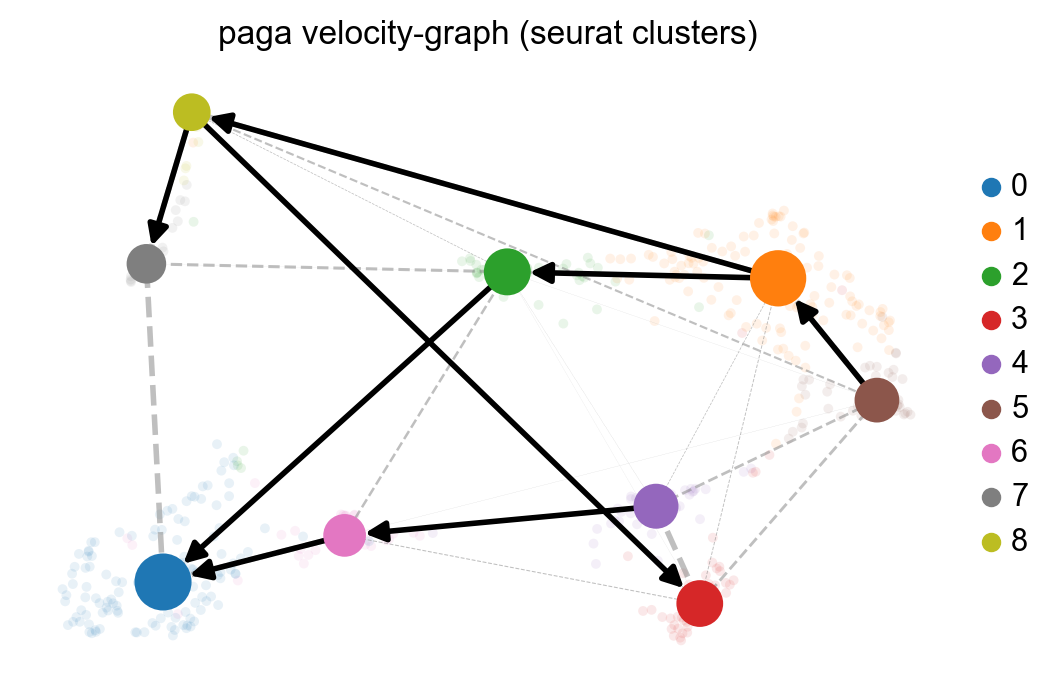

In [119]:
scv.pl.paga(adata, basis='umap', size=50, alpha=.1,
            min_edge_width=2, node_size_scale=1.5)

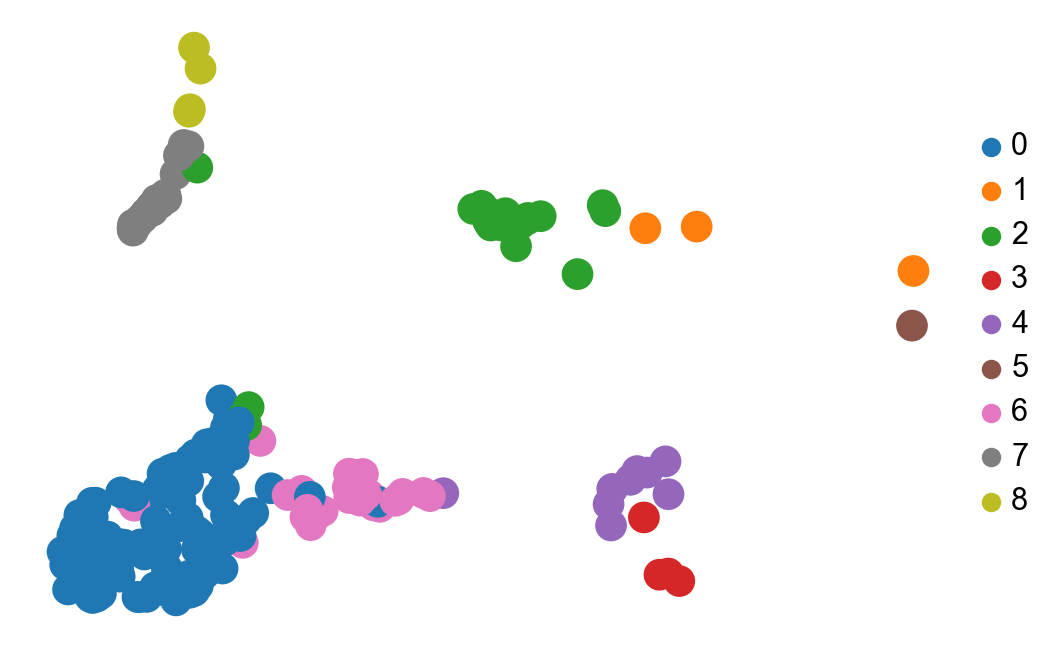

In [141]:
#Analyzing specific cell populations 
#DC
dc = ['GM-DC']
adata_subset = adata[adata.obs['celltype'].isin(dc)]
sc.pl.umap(adata_subset, color=['seurat_clusters'], frameon=False, title=['', ''])

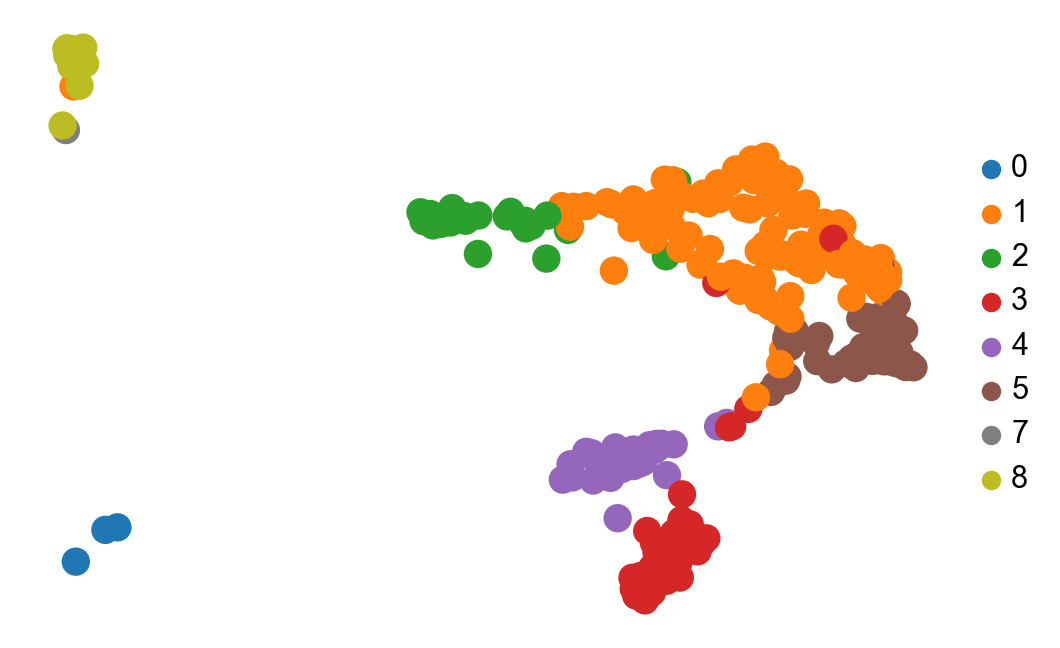

In [122]:
#Analyzing specific cell populations 
#MAC
mac = ['GM-Mac']
adata_subset = adata[adata.obs['celltype'].isin(mac)]
sc.pl.umap(adata_subset, color=['seurat_clusters'], frameon=False, title=['', ''])

computing neighbors
    finished (0:00:00) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing moments based on connectivities
    finished (0:00:00) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)
recovering dynamics (using 1/4 cores)



    finished (0:04:03) --> added 
    'fit_pars', fitted parameters for splicing dynamics (adata.var)
computing velocities
    finished (0:00:00) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)
computing velocity graph (using 1/4 cores)



    finished (0:00:00) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:00) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)
saving figure to file ./figures/scvelo_embedding_stream.pdf


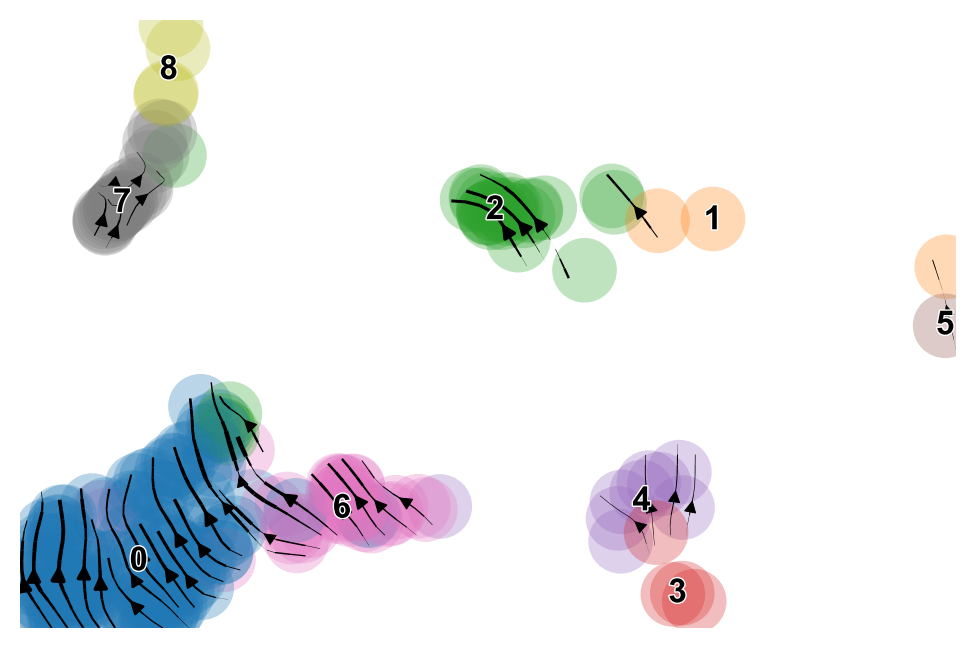

In [142]:
sc.pp.neighbors(adata_subset, n_neighbors=15, use_rep='X_pca')
#pre-process
scv.pp.filter_and_normalize(adata_subset)
scv.pp.moments(adata_subset)
scv.tl.recover_dynamics(adata_subset)
scv.tl.velocity(adata_subset, mode='dynamical')
scv.tl.velocity_graph(adata_subset)
scv.pl.velocity_embedding_stream(adata_subset, basis='umap', color=['seurat_clusters'], save='embedding_stream.pdf', title='')

In [143]:
#Using the dynamical model, we can actually look at the transcritpion rate, splicing rate, and degradation rate.
df = adata_subset.var
df = df[(df['fit_likelihood'] > .1) & df['velocity_genes'] == True]

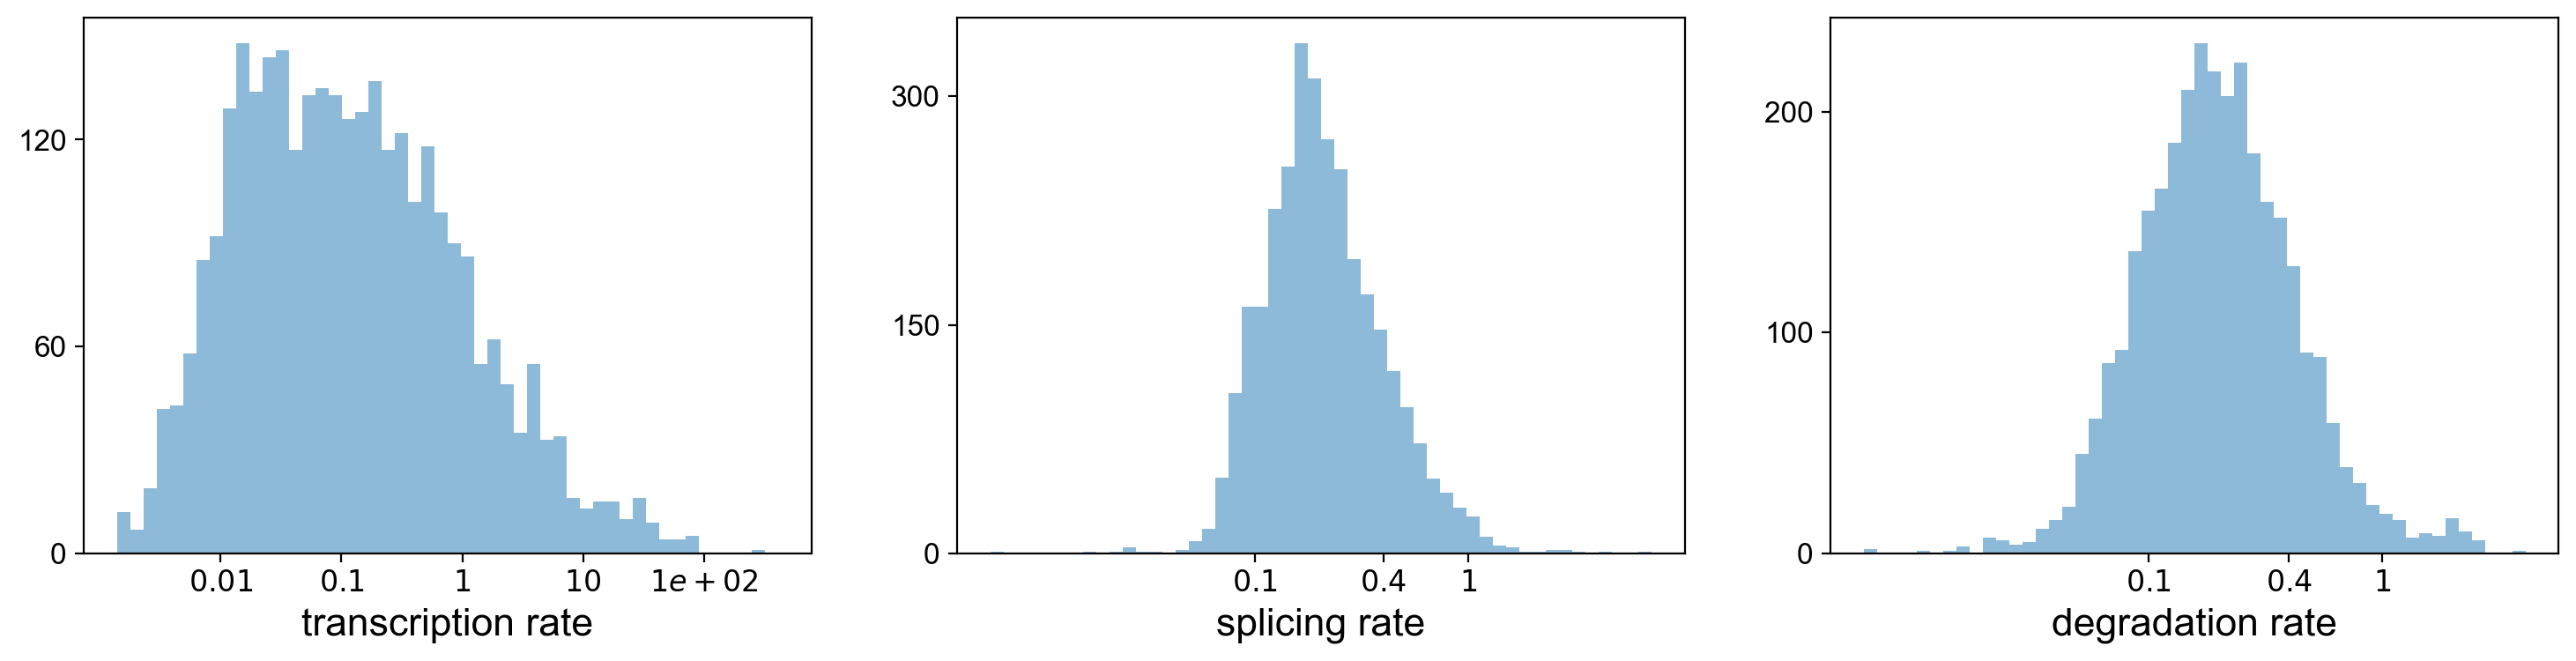

fit_r2  fit_alpha  fit_beta  fit_gamma  fit_t_  fit_scaling  \
Tcf24      0.43       2.52      0.28       0.30   21.23         0.63   
Sulf1      0.74       0.14      0.01       0.15   26.40        20.22   
Slco5a1    0.77       0.73      0.05       0.10   25.85         2.83   
Prdm14     0.43       0.52      0.22       0.28   14.01         0.77   
Trpa1      0.96       0.01      0.02       0.44   25.95         9.90   

         fit_std_u  fit_std_s  fit_likelihood  fit_u0  fit_s0  \
Tcf24         1.31   1.76e+00            0.43     0.0     0.0   
Sulf1         4.23   2.31e-01            0.28     0.0     0.0   
Slco5a1       4.37   1.59e+00            0.35     0.0     0.0   
Prdm14        0.59   3.63e-01            0.28     0.0     0.0   
Trpa1         0.11   5.04e-03            0.45     0.0     0.0   

         fit_pval_steady  fit_steady_u  fit_steady_s  fit_variance  \
Tcf24           4.94e-01          7.04          6.23          0.28   
Sulf1           3.68e-01         10.80          0.63          0.70   
Slco5a1         4.90e-01         10.06          3.58          0.42   
Prdm14          3.55e-01          1.98          1.30          0.67   
Trpa1           4.16e-04          0.66          0.03          0.20   

         fit_alignment_scaling  
Tcf24                     4.77  
Sulf1                     4.52  
Slco5a1                   7.02  
Prdm14                    2.69  
Trpa1                     1.99

In [144]:
kwargs = dict(xscale='log', fontsize=16)
with scv.GridSpec(ncols=3) as pl:
    pl.hist(df['fit_alpha'], xlabel='transcription rate', **kwargs)
    pl.hist(df['fit_beta'] * df['fit_scaling'], xlabel='splicing rate', xticks=[.1, .4, 1], **kwargs)
    pl.hist(df['fit_gamma'], xlabel='degradation rate', xticks=[.1, .4, 1], **kwargs)

scv.get_df(adata_subset, 'fit*', dropna=True).head()

computing terminal states
    identified 0 region of root cells and 1 region of end points .
    finished (0:00:00) --> added
    'root_cells', root cells of Markov diffusion process (adata.obs)
    'end_points', end points of Markov diffusion process (adata.obs)
computing latent time using root_cells as prior
    finished (0:00:00) --> added 
    'latent_time', shared time (adata.obs)


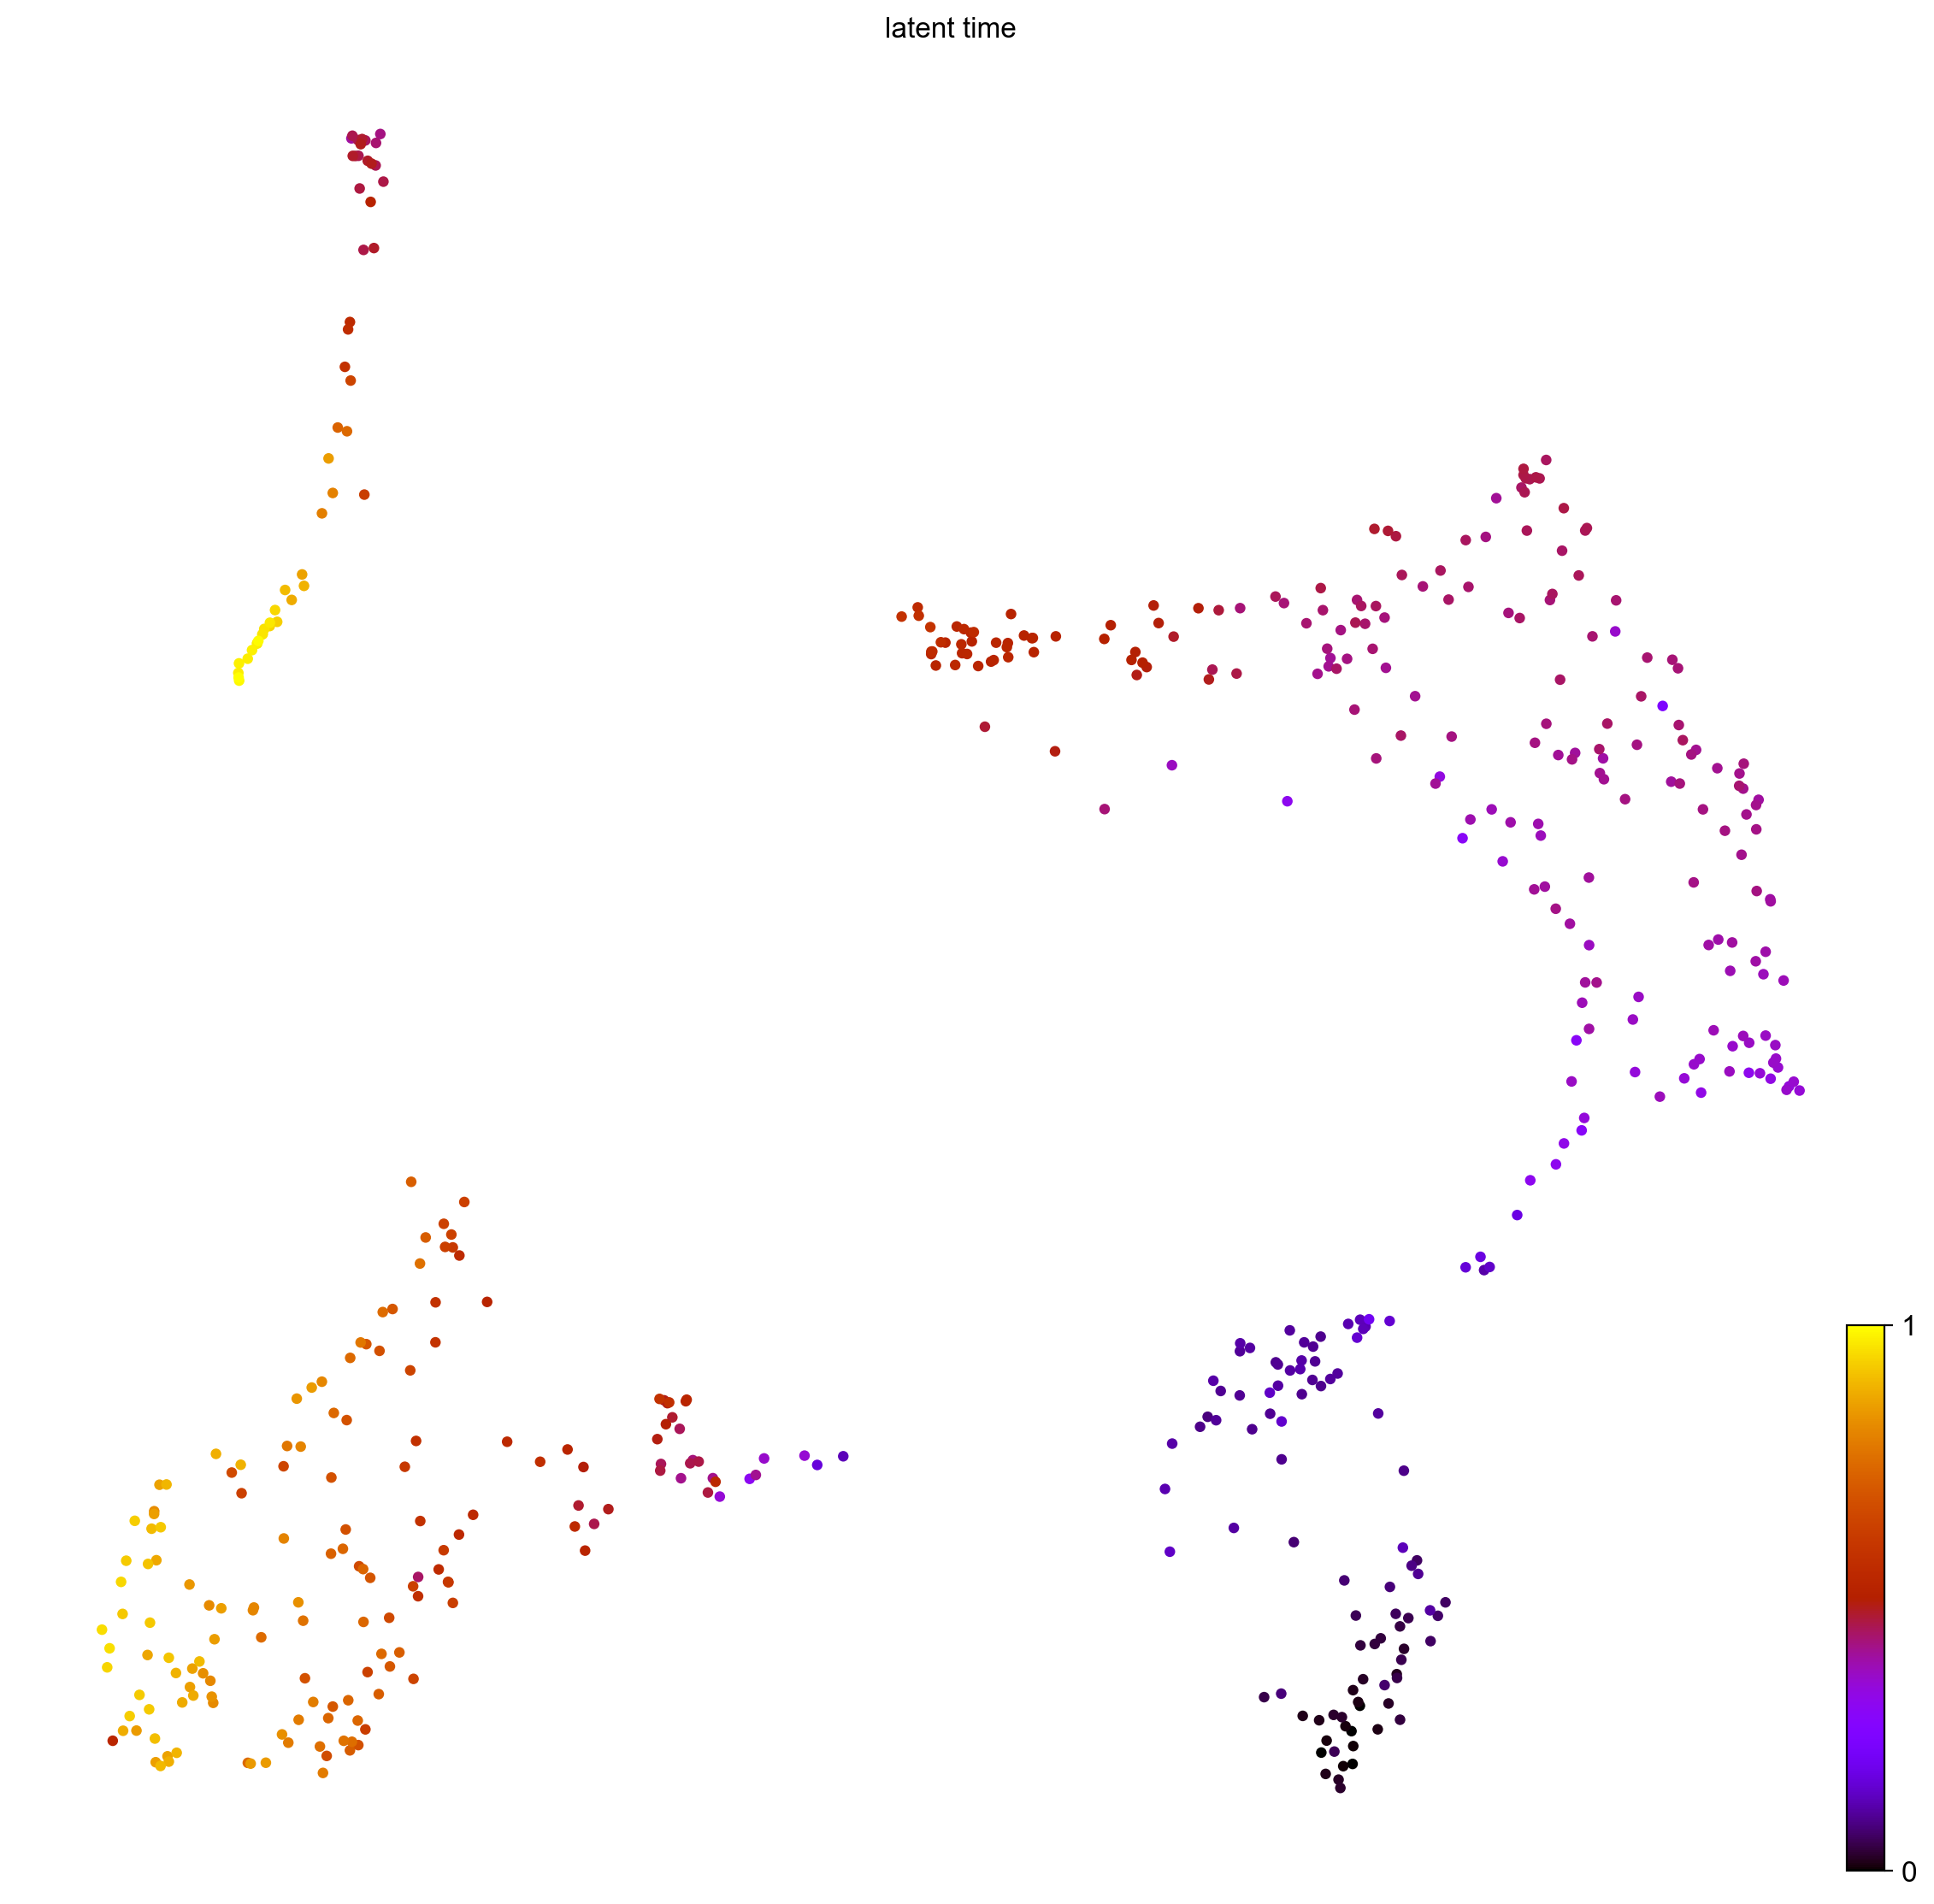

In [47]:
#Similar to pseudotime, ‘latent time’ is computed from the dynamical model.
scv.tl.latent_time(adata)
scv.pl.scatter(adata, color='latent_time', color_map='gnuplot', size=80)

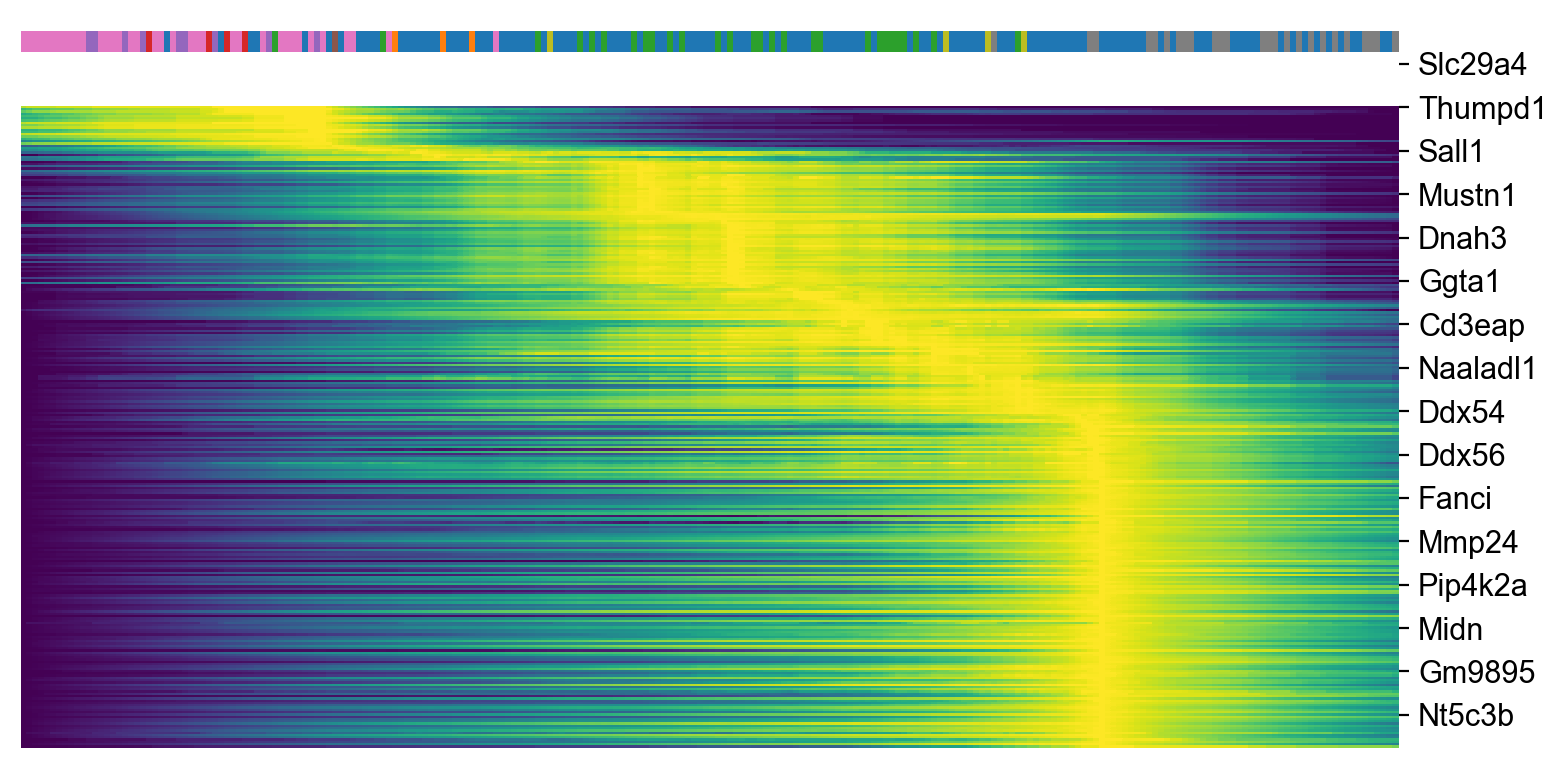

In [146]:
top_genes = adata_subset.var['fit_likelihood'].sort_values(ascending=False).index[:300]
scv.pl.heatmap(adata_subset, var_names=top_genes, sortby='latent_time', col_color='seurat_clusters', n_convolve=100)

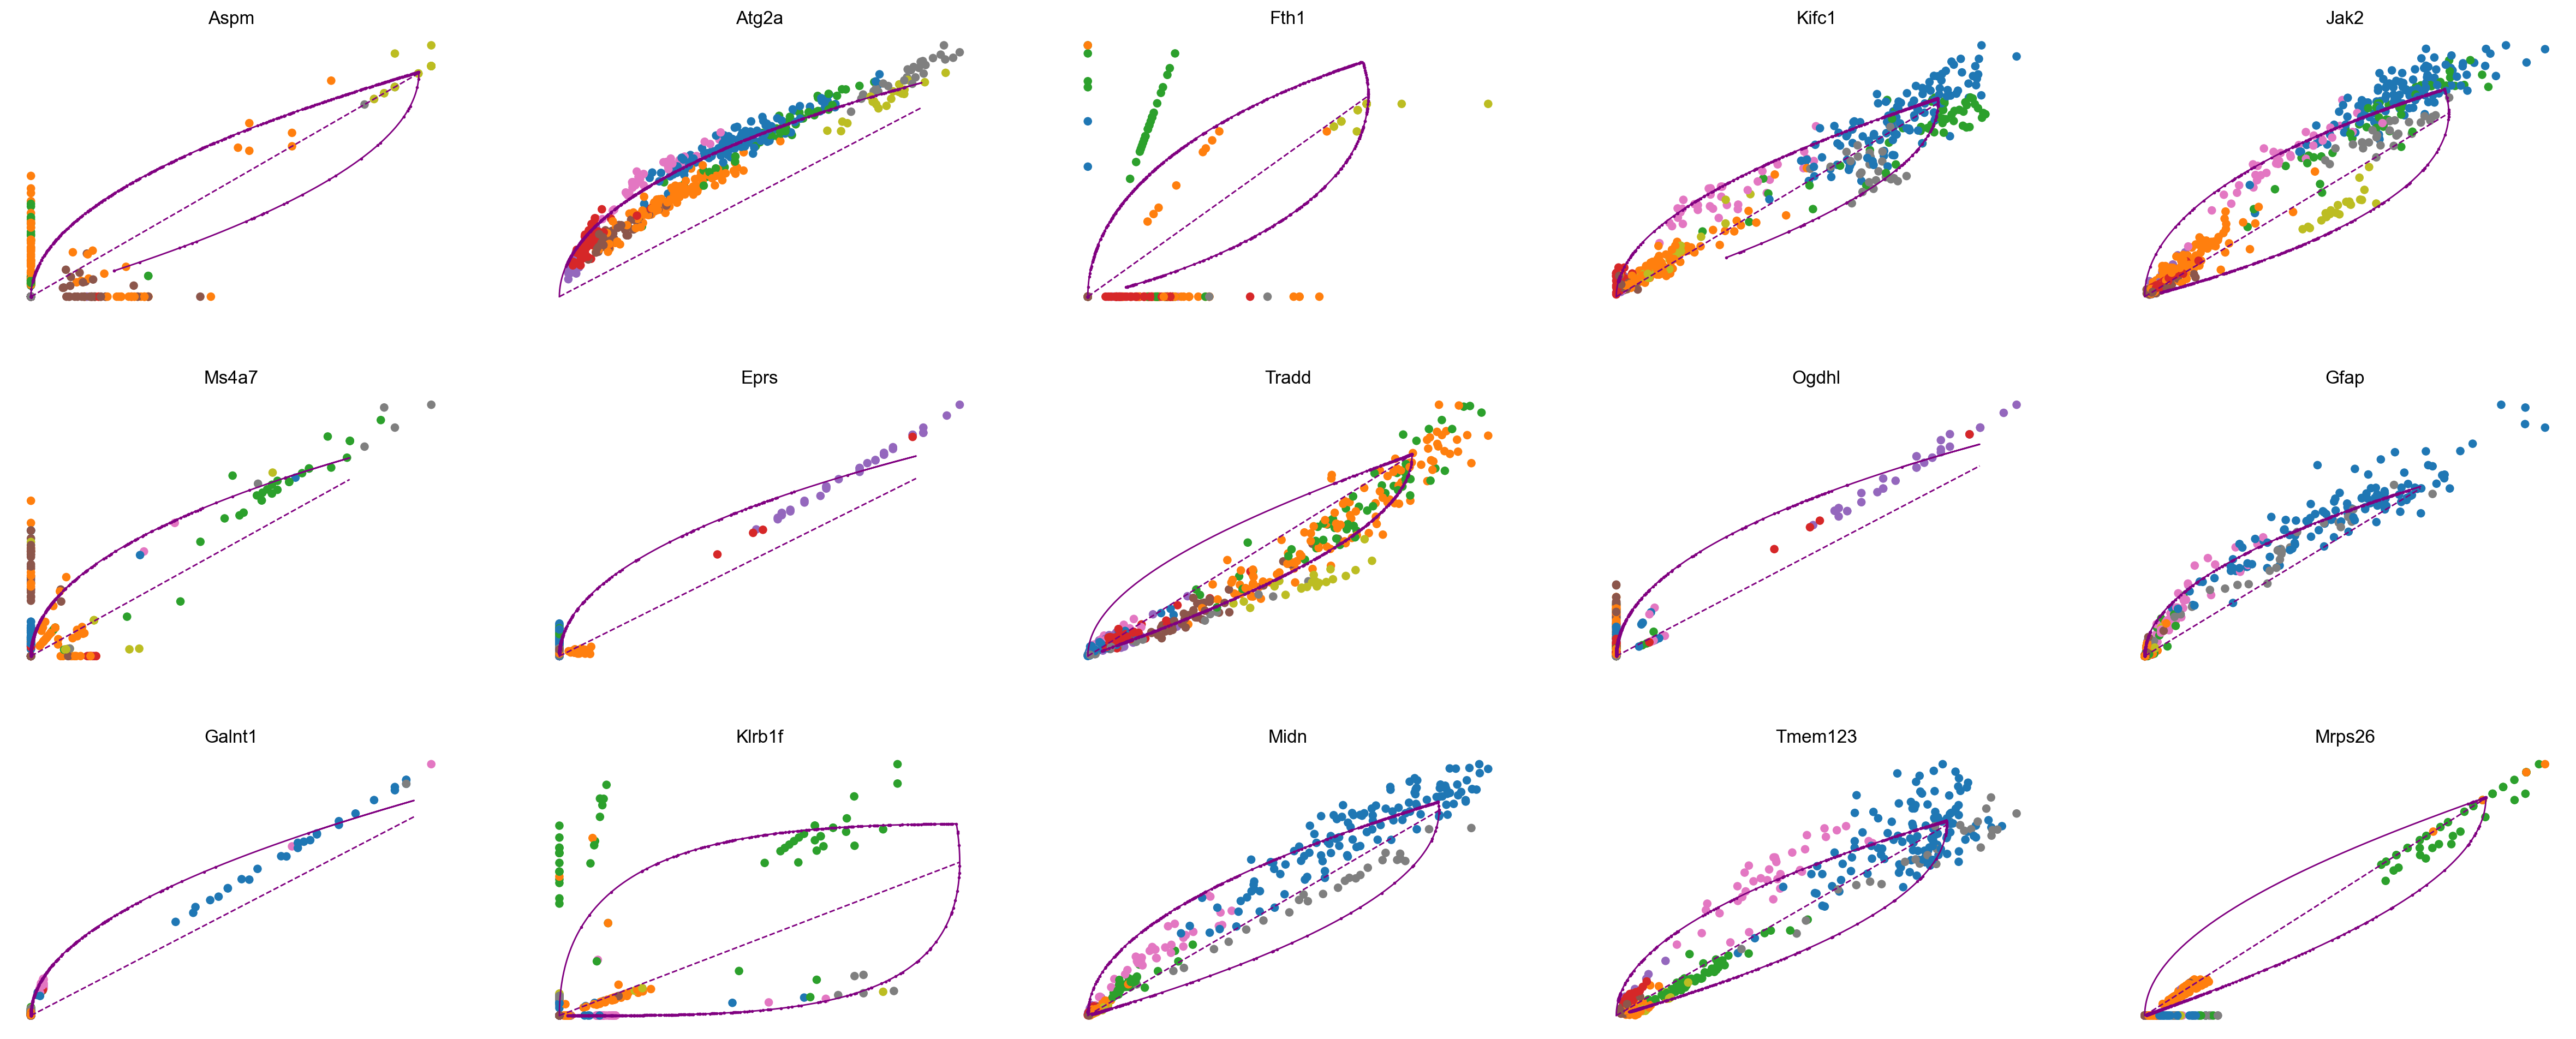

In [138]:
top_genes = adata.var['fit_likelihood'].sort_values(ascending=False).index
scv.pl.scatter(adata, color='seurat_clusters', basis=top_genes[:15], ncols=5, frameon=False)


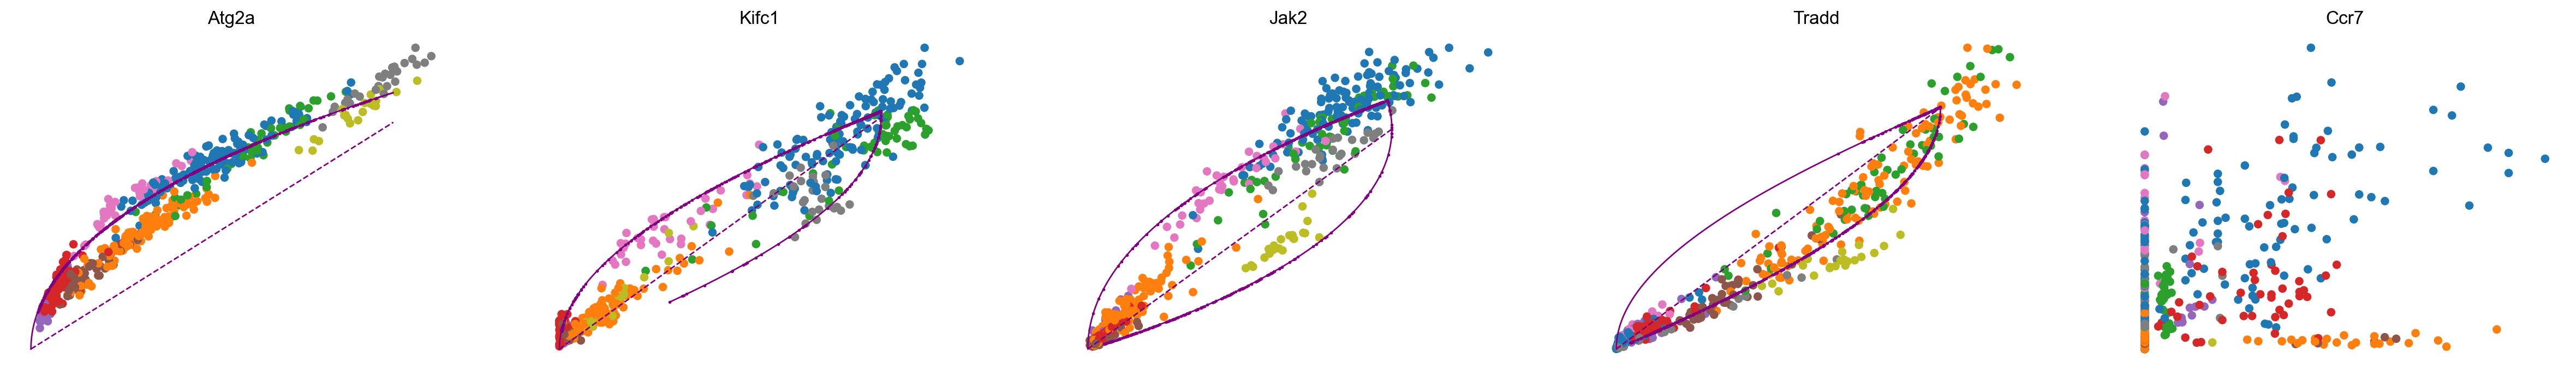

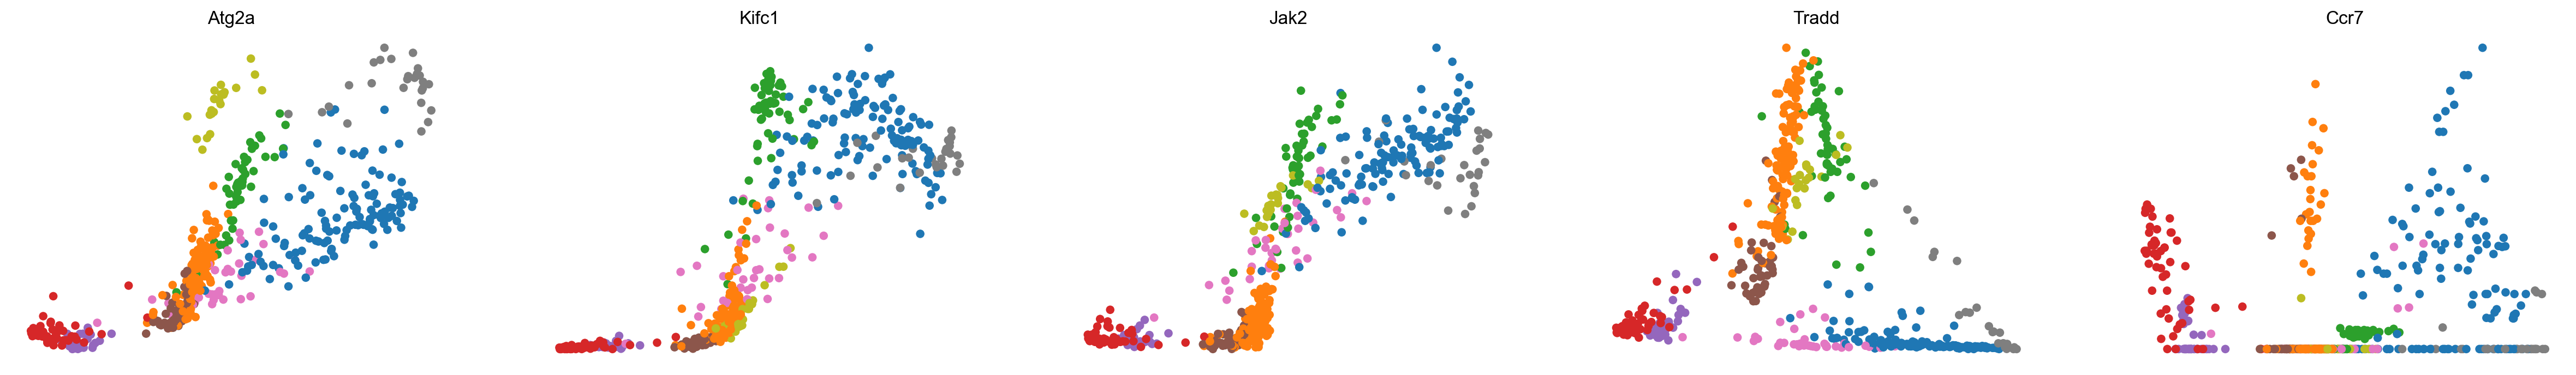

In [148]:
var_names = ['Atg2a', 'Kifc1', 'Jak2', 'Tradd', "Ccr7"]
scv.pl.scatter(adata, var_names, color='seurat_clusters', frameon=False)
scv.pl.scatter(adata, x='latent_time', y=var_names, color='seurat_clusters', frameon=False)
